# Algoritmo Apriori en Python

Gran parte de las bibliotecas orientadas a *Machine Learning* se enfocan principalmente en aprendizaje supervisado. Bibliotecas como sklearn, al menos en su versión más reciente, no incluyen algoritmos para encontrar patrones frecuentes. 

En consecuencia, para llevar a cabo esta tarea vamos a usar una implementación del algoritmo Apriori que se incluye en la biblioteca **mlxtend** de Python. La mayor parte del material en los ejemplos que se presentan en este cuaderno de trabajo se encuentra en la documentación de la propia biblioteca.


In [50]:
import numpy as np
import pandas as pd
import mlxtend as mlx
import mlxtend.preprocessing as mlp

Los datos de este ejemplo son los que aparecen en la documentación de mlxtend. Como se puede observar, están planteados en el contexto del análisis de una canasta de mercado y cada fila representa una transacción. 

In [51]:
datos = [['Milk','Onion','Nutmeg','Kidney Beans','Eggs','Yogurt'],
         ['Dill','Onion','Nutmeg','Kidney Beans','Eggs','Yogurt'],
         ['Milk','Apple','Kidney Beans','Eggs'],
         ['Milk','Unicorn','Corn','Kidney Beans','Yogurt'],
         ['Corn','Onion','Onion','Kidney Beans','Ice cream','Eggs']]
         
print(datos)

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


En primer lugar, es importante ver que la implementación de Apriori de mlxtend utiliza como entrada una **matriz binaria**. Por lo tanto, usar este algoritmo va a requerir que modifiquemos los datos en un paso de preprocesamiento. 

Para el caso de **transacciones** podemos usar el codificador *TransactionEncoder*, que también es parte de la biblioteca mlxtend, y que nos permite representar cada objeto como un atributo que puede estar o no (de ahí el True/False) en una transacción. 

In [52]:
onehotEncoder = mlp.TransactionEncoder()
datosOnehotCodeados = onehotEncoder.fit(datos).transform(datos)
print(datosOnehotCodeados)

[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


La información necesaria para interpretar cada columna se encuentra en el atributo *columns_* del objeto usado para codificar.

In [53]:
print(onehotEncoder.columns_)

['Apple', 'Corn', 'Dill', 'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Unicorn', 'Yogurt']


A partir de esta representación ya se puede usar el algoritmo Apriori, pero la propia documentación de mlxtend nos recomienda utilizar un DataFrame de pandas para tener un manejo más flexible de los resultados. 

In [54]:
datosDF = pd.DataFrame(datosOnehotCodeados,
                       columns=onehotEncoder.columns_)
datosDF

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


Ahora sí usamos apriori, que ya viene amigablemente enlazado con DataFrames de pandas. Nota los parámetros de entrada: datos y umbral de frecuencia, este último en forma de un soporte RELATIVO. 

In [55]:
import mlxtend.frequent_patterns as FP
FP.apriori(datosDF, min_support=0.5)



,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


>**El número entre parentesis se refiere al indice del arreglo obtenido tras 
aplicar onehotEncoder.columns_ y no al número de veces que aparece**

Para todavía más comodidad (porque, por supuesto, es Python <3) podemos indicar directamte el nombre de las columnas de nuestro DataFrame y tener una lectura más sencilla de los datos.

In [56]:
patronesFrecuentes = FP.apriori(datosDF,
                                min_support=0.5,
                                use_colnames=True)
patronesFrecuentes

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


Y bueno, ya teniendo el DataFrame podemos explorar nuestros patrones frecuentes. Por ejemplo, podríamos agregar una columna que nos diga el tamaño de los conjuntos, por si después quiero ver solamente los conjuntos frecuentes de un tamaño específico.

In [57]:
patronesFrecuentes['K - itemsets size'] = patronesFrecuentes['itemsets'].apply(lambda x:len(x))
patronesFrecuentes

,support,itemsets,K - itemsets size
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


Y si ahora quisiéramos ver solamente los conjuntos frecuentes de tamaño k=3, podríamos hacerlo manipulando el DataFrame de la forma habitual. 

In [58]:
patronesFrecuentes[patronesFrecuentes['K - itemsets size']>=2]

,support,itemsets,K - itemsets size
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2
10,0.6,"(Eggs, Onion, Kidney Beans)",3


In [59]:
patronesFrecuentes[patronesFrecuentes['support']>=.7]

,support,itemsets,K - itemsets size
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
5,0.8,"(Eggs, Kidney Beans)",2


¿Qué haríamos si los patrones frecuentes que quiero minar no vienen de transacciones? 

Por ejemplo, supongamos que lo que tengo son resultados de una encuesta en la ENES-Morelia. El primer atributo me dice si el estudiante es moreliano (1) o no (2). El segundo atributo me dice si el estudiante es de TICS(1), de Materiales(2) o de Geociencias(3).

¿Qué hago si las filas de mis datos NO están en el formato de una transacción, como en la canasta de mercado?

In [60]:
datosEnes = [(2, 2), (1, 1), 
              (2, 3), (2, 2),
              (1, 2), (2, 1),
              (1, 3), (2, 2)]
tablaDatos = pd.DataFrame(datosEnes,columns=['procedencia','carrera'])
tablaDatos

,procedencia,carrera
0,2,2
1,1,1
2,2,3
3,2,2
4,1,2
5,2,1
6,1,3
7,2,2


**R:** En este caso que estamos usando números para referirnos a cierta información en palabras, podríamos usar diccionarios para organizar la información. De manera que sería más entendible y la obtendríamos en esquema de transacción. 

**NOTA:** Entendí como formato de transacción como datos identificables, es decir a primera vista si ves los datos como pares de números, carece de sentido pero si lo ves como pares de diccionarios con un número precedidos de los respectivos diccionarios. Tienen más significado. Para la computadora al final ambos son números pero a nivel de codificación para nosotros los programadores es más entendible. 

In [61]:
datosEnes = [(2, 2), (1, 1), 
              (2, 3), (2, 2),
              (1, 2), (2, 1),
              (1, 3), (2, 2)]
tablaDatos = pd.DataFrame(datosEnes,columns=['procedencia','carrera'])
print(datosEnes)

[(2, 2), (1, 1), (2, 3), (2, 2), (1, 2), (2, 1), (1, 3), (2, 2)]


In [62]:
# CORREGIDO EMPLEANDO EL FORMATO DE TRANSACCIÓN 
procedencia = {1:"Moreliano" ,2:"No Moreliano"}
carrera = {1:"TICS", 2:"Materiales", 3:"Geociencias"}
datosEnes = [(procedencia[2], carrera[2]), (procedencia[1], carrera[1]), 
              (procedencia[2], carrera[3]), (procedencia[2], carrera[2]),
              (procedencia[1], carrera[2]), (procedencia[2], carrera[1]),
              (procedencia[1], carrera[3]), (procedencia[2], carrera[2])]
tablaDatos = pd.DataFrame(datosEnes,columns=['procedencia','carrera'])
#print(datosEnes)
tablaDatos

,procedencia,carrera
0,No Moreliano,Materiales
1,Moreliano,TICS
2,No Moreliano,Geociencias
3,No Moreliano,Materiales
4,Moreliano,Materiales
5,No Moreliano,TICS
6,Moreliano,Geociencias
7,No Moreliano,Materiales


Como ya se imaginan, para  poder usar apriori en una tabla de datos primero tengo que binarizar **cada valor** de los atributos. 

Esto se puede usar usando un método para DataFrames de pandas que se llama get_dummies y que permite incluso especificar que queremos True/False en nuestra binarización.

En el caso de nuestra encuesta obtendríamos los siguiente:

In [63]:
tablaBinarizadaENES = pd.get_dummies(tablaDatos, 
                    columns=tablaDatos.columns,
                    dtype = bool)
tablaBinarizadaENES

,procedencia_Moreliano,procedencia_No Moreliano,carrera_Geociencias,carrera_Materiales,carrera_TICS
0,False,True,False,True,False
1,True,False,False,False,True
2,False,True,True,False,False
3,False,True,False,True,False
4,True,False,False,True,False
5,False,True,False,False,True
6,True,False,True,False,False
7,False,True,False,True,False


Y ahora sí podríamos usar apriori

In [64]:
pfEnes = FP.apriori(tablaBinarizadaENES, min_support=0.1,use_colnames=True)
pfEnes

,support,itemsets
0,0.375,(procedencia_Moreliano)
1,0.625,(procedencia_No Moreliano)
2,0.250,(carrera_Geociencias)
3,0.500,(carrera_Materiales)
4,0.250,(carrera_TICS)
5,0.125,"(procedencia_Moreliano, carrera_Geociencias)"
6,0.125,"(procedencia_Moreliano, carrera_Materiales)"
7,0.125,"(procedencia_Moreliano, carrera_TICS)"
8,0.125,"(carrera_Geociencias, procedencia_No Moreliano)"
9,0.375,"(carrera_Materiales, procedencia_No Moreliano)"


Y veríamos que un patrón frecuente, con un umbral de frecuencia del 37.5% es {procedencia_2,carrera_2}, que traducido es: {ser foráneo, ser de Materiales}. Esto, por supuesto, no tiene sentido porque mi ejemplo es totalmente inventado y era sólo para explicar la binarización de etiquetas y el uso de apriori. 

# Actividad
Utiliza el algoritmo Apriori de la biblioteca mlxtend para encontrar patrones
frecuentes en el archivo clientesVW perfilGeneral.csv que hemos utilizando
anteriormente.

In [100]:
clients = pd.read_csv('/content/clientesVW_perfilGeneral.csv')
clients.columns = ["Sexo", "Estado_civil", "¿primera_vez_que_compra_auto?", "Edad","Hijos" ,"Salario"]
#I. Sexo: 1. Hombre 2. Mujer
#II. Estado civil: 1. Casado 2. Unión libre 3. Soltero
#III. ¿Primera vez que compra un auto? 1. Si 2. No
#IV. Edad por categorías: 1. <25 2. 25-29 3. 30-34 4. 35-39 5. 40-44 6  >44
#V. Categorías relativas a hijos 0. 0 1. 1 2. Más de 1
#VI. Categorías relativas al salario (percepción mensual en miles de pesos) 1. < 10 2. 10-15 3. 15-20 4. 20-25 5. 25-30 6. > 30
clients.head(5)

,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario
0,1,2,1,1,1,3
1,2,3,2,3,1,1
2,1,3,2,5,0,3
3,2,1,1,5,2,4
4,2,1,1,2,1,4


Es necesario hacer un preprocesamiento para que los datos de nuestro dataframe se vean como los de la canasta. 

In [101]:
# PARA Sexo
clients.replace({'Sexo' : 1}, "Hombre", inplace=True)
clients.replace({'Sexo' : 2}, "Mujer", inplace=True)

In [102]:
# Para Estado_civil
clients.replace({'Estado_civil' : 1}, "Casado", inplace=True)
clients.replace({'Estado_civil' : 2}, "Unión libre", inplace=True)
clients.replace({'Estado_civil' : 3}, "Soltero", inplace=True)

In [103]:
# Para ¿primera_vez_que_compra_auto?
clients.replace({'¿primera_vez_que_compra_auto?' : 1}, "Si", inplace=True)
clients.replace({'¿primera_vez_que_compra_auto?' : 2}, "No", inplace=True)

In [104]:
# Para Edad
clients.replace({'Edad' : 1}, "<25", inplace=True)
clients.replace({'Edad' : 2}, "25-29", inplace=True)
clients.replace({'Edad' : 3}, "30-34", inplace=True)
clients.replace({'Edad' : 4}, "35-39", inplace=True)
clients.replace({'Edad' : 5}, "40-44", inplace=True)
clients.replace({'Edad' : 6}, ">44", inplace=True)

In [105]:
# Para Hijos
clients.replace({'Hijos' : 0}, "0", inplace=True)
clients.replace({'Hijos' : 1}, "1", inplace=True)
clients.replace({'Hijos' : 2}, "Más de 1", inplace=True)

In [106]:
# Para Salario
clients.replace({'Salario' : 1}, "<10", inplace=True)
clients.replace({'Salario' : 2}, "10-15", inplace=True)
clients.replace({'Salario' : 3}, "15-20", inplace=True)
clients.replace({'Salario' : 4}, "20-25", inplace=True)
clients.replace({'Salario' : 5}, "25-30", inplace=True)
clients.replace({'Salario' : 6}, ">30", inplace=True)

In [107]:
clients.head()

,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario
0,Hombre,Unión libre,Si,<25,1,15-20
1,Mujer,Soltero,No,30-34,1,<10
2,Hombre,Soltero,No,40-44,0,15-20
3,Mujer,Casado,Si,40-44,Más de 1,20-25
4,Mujer,Casado,Si,25-29,1,20-25


Una vez hecho lo anterior podemos proceder a binarizar los datos. Que hecho la binarización obtendremos más columnas dado el rango de los valores que pueden tomar los datos en cada columna

In [108]:
clients_Binari = pd.get_dummies(clients, 
                    columns=clients.columns,
                    dtype = bool)
clients_Binari

,Sexo_Hombre,Sexo_Mujer,Estado_civil_Casado,Estado_civil_Soltero,Estado_civil_Unión libre,¿primera_vez_que_compra_auto?_No,¿primera_vez_que_compra_auto?_Si,Edad_25-29,Edad_30-34,Edad_35-39,Edad_40-44,Edad_<25,Edad_>44,Hijos_0,Hijos_1,Hijos_Más de 1,Salario_10-15,Salario_15-20,Salario_20-25,Salario_25-30,Salario_<10,Salario_>30
0,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
1,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
2,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False
3,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
4,False,True,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,True,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
245,False,True,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False
246,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
247,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True


## Primero, para determinar un umbral de frecuencia apropiado, elabora una gráfica
que en el eje de las x represente umbral utilizado y en el eje de las
y represente la cantidad de patrones encontrados.

In [109]:
clients_pat = FP.apriori(clients_Binari, min_support=1,use_colnames=True)
clients_pat.shape[0]

0

In [110]:
support = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = []
for i in support:
  clients_pat = FP.apriori(clients_Binari, min_support=i,use_colnames=True)
  y.append(clients_pat.shape[0])

x = support

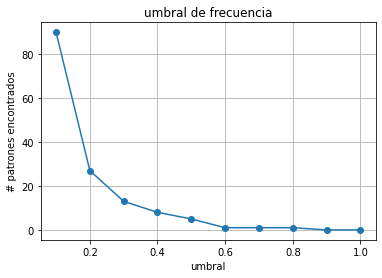

In [111]:
import matplotlib.pyplot as plt

plt.plot(x,y, "-o")
plt.grid()
plt.xlabel('umbral')
plt.ylabel('# patrones encontrados')
plt.title('umbral de frecuencia')
plt.show()

## Decide con base en la gráfica: ¿cuál sería un umbral de frecuencia apropiado? Justifica tu respuesta
**R.** He de tomar como umbral el valor de 0.4, la razón de ello es ante el hecho de que se encuentra posicionado a la mitad, es decir 0.3, 0.2 y 0.1 me dan una cantidad de patrones alta pero por otro lado 0.5, 0.6, ..., 1 me dan patrones cercanos a cero es decir no me dan patrones. Pero 0.4 me da patrones que no son muchos pero tampoco son pocos, obteniendo a partes iguales. De ahí mi elección 

## Utilizando el umbral de frecuencia que decidiste, encuentra los patrones frecuentes.

In [112]:
clients_pat = FP.apriori(clients_Binari, min_support=0.4, use_colnames=True)
clients_pat

,support,itemsets
0,0.522088,(Sexo_Hombre)
1,0.477912,(Sexo_Mujer)
2,0.510040,(Estado_civil_Casado)
3,0.851406,(¿primera_vez_que_compra_auto?_No)
4,0.590361,(Hijos_0)
5,0.469880,"(Sexo_Hombre, ¿primera_vez_que_compra_auto?_No)"
6,0.433735,"(¿primera_vez_que_compra_auto?_No, Estado_civi..."
7,0.502008,"(¿primera_vez_que_compra_auto?_No, Hijos_0)"


## Interpreta y discute los patrones encontrados.

In [113]:
# Sóólo para ver que dice cada reglon completo
for x in clients_pat.itemsets:
  print(x)

frozenset({'Sexo_Hombre'})
frozenset({'Sexo_Mujer'})
frozenset({'Estado_civil_Casado'})
frozenset({'¿primera_vez_que_compra_auto?_No'})
frozenset({'Hijos_0'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Casado'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Hijos_0'})


**R:** Observemos que entre los datos encontramos más frecuente el sexo masculino que el femenimo, asíí como el hecho de que aparece más las personas casadas, sin hijos y que ya han comprado auto. Pero ojo aquí, "¿Primera_vez_que_compra_auto?_No" aparece tres veces, con "Sexo_Hombre", "Estado_Civil_Casado" y con "Hijos_0" con lo que podemos deducir que las personas que más compran y a los que podemos persuadir más (dado que son más propensos a comprar) son los hombres casados, sin hijos y que ya han comprado auto. De esta manera, al saber que son casados, sin hijos y que ya han comprado auto podemos ofrecer de acorde a sus necesidades, desde un seguro hasta un auto para únicamente para dos personas. 

# Encuentra patrones frecuentes en los datos del archivo perfilClientes.csv,
que conteníía las respuestas de los clientes al cuestionario para establecer un perfil
psicográfico. Para determinar un umbral de frecuencia apropiado, experimenta
con diferentes opciones hasta encontrar un valor que te permita obtener patrones
con k ≥ 2.

In [79]:
clientes = pd.read_csv('/content/perfilClientes.csv')
clientes.shape
#En el documento csv cada fila corresponde a un cliente, cada columna corresponde
#a una de las 62 preguntas

(249, 62)

In [80]:
clientes.columns = ["pregunta_{0}".format(x+1) for x in range (clientes.shape[1])]
clientes.index = ["cliente_{0}".format(x+1) for x in range (clientes.shape[0])]

In [81]:
clientes.head(2)

,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,pregunta_14,pregunta_15,pregunta_16,pregunta_17,pregunta_18,pregunta_19,pregunta_20,pregunta_21,pregunta_22,pregunta_23,pregunta_24,pregunta_25,pregunta_26,pregunta_27,pregunta_28,pregunta_29,pregunta_30,pregunta_31,pregunta_32,pregunta_33,pregunta_34,pregunta_35,pregunta_36,pregunta_37,pregunta_38,pregunta_39,pregunta_40,pregunta_41,pregunta_42,pregunta_43,pregunta_44,pregunta_45,pregunta_46,pregunta_47,pregunta_48,pregunta_49,pregunta_50,pregunta_51,pregunta_52,pregunta_53,pregunta_54,pregunta_55,pregunta_56,pregunta_57,pregunta_58,pregunta_59,pregunta_60,pregunta_61,pregunta_62
cliente_1,7,7,7,5,4,4,5,4,5,5,4,4,4,2,3,4,4,3,4,2,4,4,7,1,4,3,4,5,7,4,1,5,5,5,3,3,4,7,4,3,7,6,4,7,6,6,7,6,6,7,1,1,1,1,1,1,5,4,3,5,4,5
cliente_2,5,4,6,5,7,5,3,5,4,5,5,5,6,3,3,4,2,4,3,4,2,3,3,4,2,4,5,3,3,4,7,5,7,5,7,6,5,7,3,2,1,1,1,1,4,3,4,4,3,2,4,4,3,5,6,3,4,4,5,3,4,4


En el cuestionario se utilizo una escala de 7 puntos:
* 1 = completamente en desacuerdo
* 4 = ni de acuerdo ni en desacuerdo 
* 7 = completamente de acuerdo

In [82]:
clientes_Bi = pd.get_dummies(clientes, 
                    columns=clientes.columns,
                    dtype = bool)
clientes_Bi

,pregunta_1_1,pregunta_1_2,pregunta_1_3,pregunta_1_4,pregunta_1_5,pregunta_1_6,pregunta_1_7,pregunta_2_1,pregunta_2_2,pregunta_2_3,pregunta_2_4,pregunta_2_5,pregunta_2_6,pregunta_2_7,pregunta_3_1,pregunta_3_2,pregunta_3_3,pregunta_3_4,pregunta_3_5,pregunta_3_6,pregunta_3_7,pregunta_4_1,pregunta_4_2,pregunta_4_3,pregunta_4_4,pregunta_4_5,pregunta_4_6,pregunta_4_7,pregunta_5_1,pregunta_5_2,pregunta_5_3,pregunta_5_4,pregunta_5_5,pregunta_5_6,pregunta_5_7,pregunta_6_1,pregunta_6_2,pregunta_6_3,pregunta_6_4,pregunta_6_5,...,pregunta_57_2,pregunta_57_3,pregunta_57_4,pregunta_57_5,pregunta_57_6,pregunta_57_7,pregunta_58_2,pregunta_58_3,pregunta_58_4,pregunta_58_5,pregunta_58_6,pregunta_58_7,pregunta_59_1,pregunta_59_2,pregunta_59_3,pregunta_59_4,pregunta_59_5,pregunta_59_6,pregunta_59_7,pregunta_60_1,pregunta_60_2,pregunta_60_3,pregunta_60_4,pregunta_60_5,pregunta_60_6,pregunta_60_7,pregunta_61_1,pregunta_61_2,pregunta_61_3,pregunta_61_4,pregunta_61_5,pregunta_61_6,pregunta_61_7,pregunta_62_1,pregunta_62_2,pregunta_62_3,pregunta_62_4,pregunta_62_5,pregunta_62_6,pregunta_62_7
cliente_1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
cliente_2,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
cliente_3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
cliente_4,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
cliente_5,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cliente_245,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,F

In [83]:
support = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = []
for i in support:
  clientes_pat = FP.apriori(clientes_Bi, min_support=i, use_colnames=True)
  y.append(clientes_pat.shape[0])

x = support

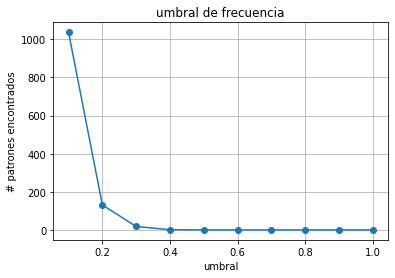

In [84]:
plt.plot(x,y, "-o")
plt.grid()
plt.xlabel('umbral')
plt.ylabel('# patrones encontrados')
plt.title('umbral de frecuencia')
plt.show()

In [85]:
clientes_pat = FP.apriori(clientes_Bi, min_support=0.1, use_colnames=True)
clientes_pat

,support,itemsets
0,0.136546,(pregunta_1_3)
1,0.216867,(pregunta_1_4)
2,0.128514,(pregunta_1_5)
3,0.253012,(pregunta_1_6)
4,0.228916,(pregunta_1_7)
...,...,...
1032,0.120482,"(pregunta_59_4, pregunta_60_5)"
1033,0.112450,"(pregunta_59_4, pregunta_61_4)"
1034,0.104418,"(pregunta_59_5, pregunta_61_4)"
1035,0.124498,"(pregunta_61_4, pregunta_60_5)"


In [86]:
# Para ver todas las preguntas en orden 
for x in clientes_pat.itemsets:
  print(x)

frozenset({'pregunta_1_3'})
frozenset({'pregunta_1_4'})
frozenset({'pregunta_1_5'})
frozenset({'pregunta_1_6'})
frozenset({'pregunta_1_7'})
frozenset({'pregunta_2_2'})
frozenset({'pregunta_2_3'})
frozenset({'pregunta_2_4'})
frozenset({'pregunta_2_6'})
frozenset({'pregunta_2_7'})
frozenset({'pregunta_3_3'})
frozenset({'pregunta_3_4'})
frozenset({'pregunta_3_5'})
frozenset({'pregunta_3_6'})
frozenset({'pregunta_4_2'})
frozenset({'pregunta_4_3'})
frozenset({'pregunta_4_4'})
frozenset({'pregunta_4_5'})
frozenset({'pregunta_4_6'})
frozenset({'pregunta_5_1'})
frozenset({'pregunta_5_2'})
frozenset({'pregunta_5_3'})
frozenset({'pregunta_5_4'})
frozenset({'pregunta_5_5'})
frozenset({'pregunta_5_6'})
frozenset({'pregunta_6_3'})
frozenset({'pregunta_6_4'})
frozenset({'pregunta_6_5'})
frozenset({'pregunta_7_3'})
frozenset({'pregunta_7_4'})
frozenset({'pregunta_7_5'})
frozenset({'pregunta_8_3'})
frozenset({'pregunta_8_4'})
frozenset({'pregunta_8_5'})
frozenset({'pregunta_9_3'})
frozenset({'pregunta

## Analiza y discute los patrones encontrados en el punto anterior.
**R:** Con un umbral de 0.2, que dada la gráfica se veía más decente, encontre únicamente patrones k = 1 pero con un umbral 0.1 logra obtener más patrones y una parte de ellos k = 2. Pare ahí porque para umbral menor a 0.1 la ejecución de la celda tardaba mucho tiempo y no parecía acabar. 

En cuanto a los patrones obtenidos de k = 2 (y tras revisar todos los patrones de la celda inferior) tenemos que las preguntas más frecuentes son (Estas a su vez se combinan con otras preguntas que no son frecuentes. Al menos no aparecen más de 5 veces. ):
 - P1_6 = Quiero un carro que este de moda (muy de acuerdo)
 - P1_7 = Quiero un carro que este de moda (Completamente de acuerdo)
 - P3_4 = No tengo tiempo de preocuparme por el mantenimiento del carro (ni de acuerdo ni en desacuerdo) 
 - P4_5 = Solo necesito transporte básico
 - P6_4 = Los carros de ahora duran mucho más que los de antes (Ni de acuerdo ni en desacuerdo)
 - P7_4 = Mi carro debe de funcionar con total funcionalidad (ni de acuerdo ni en desacuerdo) 
 - P8_4 = Quiero un carro que sea fácil de operar (ni de acuerdo ni en desacuerdo) 
 - P9_3 = Quiero un carro que me de un buen desempeño (Ligeramente en desacuerdo)
 - P9_4 = Quiero un carro que me de un buen desempeño (Ni de acuerdo ni en desacuerdo) 
 - P9_5 = Quiero un carro que me de un buen desempeño (Ligeramente de acuerdo) 
 - P10_3 = Cuando compro un carro, la confianza es lo más importante para mı́ (Ligeramente en desacuerdo)
 - P10_4 = Cuando compro un carro, la confianza es lo más importante para mı́ (Ni de acuerdo ni en desacuerdo)
 - P11_4 = Los carros de ahora son más eficientes que los de antes (Ni de acuerdo ni en desacuerdo)
 - P12_4 = Quiero un carro que ahorre en gasolina (Ni de acuerdo ni en desacuerdo) 
 - P13_4 = Me encanta manejar (Ni de acuerdo ni en desacuerdo)
 - P14_6 = El carro que compre debe ser capaz de aguantar largos viajes en carretera (Muy de acuerdo)
 - P15_6 = Quiero el mayor equipamiento que pueda obtener por mi dinero (Muy de acuerdo)
 - P17_6 = Quiero un carro que proyecte energı́a y velocidad (Muy de acuerdo)
 - P19_4 = Desearı́a que hubiera regulaciones más estrictas en los modelos que salen al
mercado (Ni de acuerdo ni en desacuerdo)
 - P24_1 = Quiero un carro que funcione bien cuando salgo de las áreas urbanas (Completamente en desacuerdo)
 - P28_2 = Los carros alemanes son los mejor hechos (En desacuerdo)
 - P35_4 = Siempre me han fascinado los carros que tienen ya prestigio y seguidores (Ni en acuerdo ni en desacuerdo) 
 - P55_1 = Todos los carros se ven iguales o muy parecidos en estos dı́as (Completamente en desacuerdo)
 - P61_4 = El gobierno deberı́a implementar más medidas a favor del transporte público (Ni en acuerdo ni en desacuerdo

 A partir del análisis de las preguntas anteriores podemos inferir un perfil de     cliente (o clientes) en el que principalmente buscan un auto a la moda, que no demande mucho mantenimiento, que sea duradero, facil de operar, con total funcionalidad de tal manera que les de confianza, buen desempeño, que ahorre gasolina y que sea veloz. Así mismo este tipo de cliente (o clientes) no presta mucha atención en cuanto al funcionamiento en áreas, es decir no presta atención a si el desempeño es igual en áreas urbanas como en terraseria, tampoco presta atención a las regulaciones del transporte publico y menos al prestigio de los autos.   




In [ ]:
Preguntas con k = 2
frozenset({'pregunta_1_4', 'pregunta_51_4'})
frozenset({'pregunta_1_6', 'pregunta_3_4'})
frozenset({'pregunta_1_6', 'pregunta_11_4'})
frozenset({'pregunta_1_6', 'pregunta_12_4'})
frozenset({'pregunta_24_1', 'pregunta_1_6'})
frozenset({'pregunta_1_6', 'pregunta_31_2'})
frozenset({'pregunta_1_6', 'pregunta_35_4'})
frozenset({'pregunta_1_6', 'pregunta_40_4'})
frozenset({'pregunta_1_6', 'pregunta_49_6'})
frozenset({'pregunta_3_4', 'pregunta_1_7'})
frozenset({'pregunta_5_4', 'pregunta_1_7'})
frozenset({'pregunta_8_4', 'pregunta_1_7'})
frozenset({'pregunta_12_4', 'pregunta_1_7'})
frozenset({'pregunta_19_4', 'pregunta_1_7'})
frozenset({'pregunta_1_7', 'pregunta_27_4'})
frozenset({'pregunta_30_4', 'pregunta_1_7'})
frozenset({'pregunta_39_4', 'pregunta_1_7'})
frozenset({'pregunta_47_7', 'pregunta_1_7'})
frozenset({'pregunta_55_1', 'pregunta_1_7'})
frozenset({'pregunta_2_2', 'pregunta_25_2'})
frozenset({'pregunta_2_2', 'pregunta_28_2'})
frozenset({'pregunta_55_4', 'pregunta_2_3'})
frozenset({'pregunta_24_1', 'pregunta_2_6'})
frozenset({'pregunta_2_6', 'pregunta_45_6'})
frozenset({'pregunta_51_2', 'pregunta_2_6'})
frozenset({'pregunta_2_6', 'pregunta_54_1'})
frozenset({'pregunta_2_6', 'pregunta_56_1'})
frozenset({'pregunta_24_1', 'pregunta_2_7'})
frozenset({'pregunta_2_7', 'pregunta_48_7'})
frozenset({'pregunta_2_7', 'pregunta_55_1'})
frozenset({'pregunta_36_4', 'pregunta_3_3'})
frozenset({'pregunta_6_4', 'pregunta_3_4'})
frozenset({'pregunta_3_4', 'pregunta_6_5'})
frozenset({'pregunta_7_4', 'pregunta_3_4'})
frozenset({'pregunta_8_4', 'pregunta_3_4'})
frozenset({'pregunta_9_5', 'pregunta_3_4'})
frozenset({'pregunta_10_3', 'pregunta_3_4'})
frozenset({'pregunta_3_4', 'pregunta_11_4'})
frozenset({'pregunta_3_4', 'pregunta_12_4'})
frozenset({'pregunta_13_4', 'pregunta_3_4'})
frozenset({'pregunta_17_6', 'pregunta_3_4'})
frozenset({'pregunta_3_4', 'pregunta_21_6'})
frozenset({'pregunta_24_1', 'pregunta_3_4'})
frozenset({'pregunta_26_2', 'pregunta_3_4'})
frozenset({'pregunta_28_2', 'pregunta_3_4'})
frozenset({'pregunta_29_3', 'pregunta_3_4'})
frozenset({'pregunta_31_2', 'pregunta_3_4'})
frozenset({'pregunta_32_4', 'pregunta_3_4'})
frozenset({'pregunta_33_4', 'pregunta_3_4'})
frozenset({'pregunta_3_4', 'pregunta_34_4'})
frozenset({'pregunta_35_4', 'pregunta_3_4'})
frozenset({'pregunta_35_5', 'pregunta_3_4'})
frozenset({'pregunta_36_4', 'pregunta_3_4'})
frozenset({'pregunta_38_4', 'pregunta_3_4'})
frozenset({'pregunta_39_4', 'pregunta_3_4'})
frozenset({'pregunta_3_4', 'pregunta_40_4'})
frozenset({'pregunta_3_4', 'pregunta_42_4'})
frozenset({'pregunta_43_4', 'pregunta_3_4'})
frozenset({'pregunta_3_4', 'pregunta_45_6'})
frozenset({'pregunta_51_2', 'pregunta_3_4'})
frozenset({'pregunta_57_4', 'pregunta_3_4'})
frozenset({'pregunta_58_4', 'pregunta_3_4'})
frozenset({'pregunta_60_5', 'pregunta_3_4'})
frozenset({'pregunta_61_4', 'pregunta_3_4'})
frozenset({'pregunta_3_4', 'pregunta_62_4'})
frozenset({'pregunta_3_5', 'pregunta_11_4'})
frozenset({'pregunta_24_1', 'pregunta_4_4'})
frozenset({'pregunta_6_4', 'pregunta_4_5'})
frozenset({'pregunta_7_4', 'pregunta_4_5'})
frozenset({'pregunta_10_4', 'pregunta_4_5'})
frozenset({'pregunta_11_4', 'pregunta_4_5'})
frozenset({'pregunta_13_4', 'pregunta_4_5'})
frozenset({'pregunta_24_1', 'pregunta_4_5'})
frozenset({'pregunta_30_3', 'pregunta_4_5'})
frozenset({'pregunta_57_4', 'pregunta_4_5'})
frozenset({'pregunta_58_4', 'pregunta_4_5'})
frozenset({'pregunta_59_4', 'pregunta_4_5'})
frozenset({'pregunta_61_4', 'pregunta_4_5'})
frozenset({'pregunta_62_4', 'pregunta_4_5'})
frozenset({'pregunta_12_4', 'pregunta_5_5'})
frozenset({'pregunta_7_4', 'pregunta_6_3'})
frozenset({'pregunta_6_3', 'pregunta_12_4'})
frozenset({'pregunta_7_3', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_7_4'})
frozenset({'pregunta_6_4', 'pregunta_8_3'})
frozenset({'pregunta_8_4', 'pregunta_6_4'})
frozenset({'pregunta_9_3', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_9_4'})
frozenset({'pregunta_10_3', 'pregunta_6_4'})
frozenset({'pregunta_10_4', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_11_4'})
frozenset({'pregunta_6_4', 'pregunta_12_4'})
frozenset({'pregunta_13_4', 'pregunta_6_4'})
frozenset({'pregunta_14_6', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_16_4'})
frozenset({'pregunta_18_4', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_18_5'})
frozenset({'pregunta_6_4', 'pregunta_19_4'})
frozenset({'pregunta_6_4', 'pregunta_19_5'})
frozenset({'pregunta_22_6', 'pregunta_6_4'})
frozenset({'pregunta_24_1', 'pregunta_6_4'})
frozenset({'pregunta_26_2', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_27_4'})
frozenset({'pregunta_28_4', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_29_3'})
frozenset({'pregunta_6_4', 'pregunta_30_4'})
frozenset({'pregunta_32_5', 'pregunta_6_4'})
frozenset({'pregunta_33_5', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_35_4'})
frozenset({'pregunta_35_5', 'pregunta_6_4'})
frozenset({'pregunta_36_5', 'pregunta_6_4'})
frozenset({'pregunta_38_4', 'pregunta_6_4'})
frozenset({'pregunta_38_5', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_40_3'})
frozenset({'pregunta_6_4', 'pregunta_40_4'})
frozenset({'pregunta_6_4', 'pregunta_42_2'})
frozenset({'pregunta_6_4', 'pregunta_43_4'})
frozenset({'pregunta_6_4', 'pregunta_45_6'})
frozenset({'pregunta_6_4', 'pregunta_50_4'})
frozenset({'pregunta_6_4', 'pregunta_54_4'})
frozenset({'pregunta_6_4', 'pregunta_55_4'})
frozenset({'pregunta_6_4', 'pregunta_57_4'})
frozenset({'pregunta_6_4', 'pregunta_58_4'})
frozenset({'pregunta_6_4', 'pregunta_59_3'})
frozenset({'pregunta_6_4', 'pregunta_59_4'})
frozenset({'pregunta_60_5', 'pregunta_6_4'})
frozenset({'pregunta_6_4', 'pregunta_61_4'})
frozenset({'pregunta_6_4', 'pregunta_62_4'})
frozenset({'pregunta_8_4', 'pregunta_6_5'})
frozenset({'pregunta_6_5', 'pregunta_11_4'})
frozenset({'pregunta_35_4', 'pregunta_6_5'})
frozenset({'pregunta_36_4', 'pregunta_6_5'})
frozenset({'pregunta_7_3', 'pregunta_11_4'})
frozenset({'pregunta_7_3', 'pregunta_29_3'})
frozenset({'pregunta_7_3', 'pregunta_58_4'})
frozenset({'pregunta_7_3', 'pregunta_61_4'})
frozenset({'pregunta_8_4', 'pregunta_7_4'})
frozenset({'pregunta_8_5', 'pregunta_7_4'})
frozenset({'pregunta_9_3', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_9_4'})
frozenset({'pregunta_10_3', 'pregunta_7_4'})
frozenset({'pregunta_10_4', 'pregunta_7_4'})
frozenset({'pregunta_11_3', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_11_4'})
frozenset({'pregunta_7_4', 'pregunta_12_4'})
frozenset({'pregunta_13_4', 'pregunta_7_4'})
frozenset({'pregunta_13_5', 'pregunta_7_4'})
frozenset({'pregunta_14_6', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_16_5'})
frozenset({'pregunta_17_6', 'pregunta_7_4'})
frozenset({'pregunta_18_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_19_4'})
frozenset({'pregunta_7_4', 'pregunta_19_6'})
frozenset({'pregunta_21_5', 'pregunta_7_4'})
frozenset({'pregunta_23_3', 'pregunta_7_4'})
frozenset({'pregunta_24_1', 'pregunta_7_4'})
frozenset({'pregunta_24_2', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_25_2'})
frozenset({'pregunta_26_2', 'pregunta_7_4'})
frozenset({'pregunta_27_3', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_27_4'})
frozenset({'pregunta_28_2', 'pregunta_7_4'})
frozenset({'pregunta_30_3', 'pregunta_7_4'})
frozenset({'pregunta_30_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_31_6'})
frozenset({'pregunta_32_4', 'pregunta_7_4'})
frozenset({'pregunta_32_5', 'pregunta_7_4'})
frozenset({'pregunta_33_5', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_34_4'})
frozenset({'pregunta_34_5', 'pregunta_7_4'})
frozenset({'pregunta_35_4', 'pregunta_7_4'})
frozenset({'pregunta_35_5', 'pregunta_7_4'})
frozenset({'pregunta_36_4', 'pregunta_7_4'})
frozenset({'pregunta_36_5', 'pregunta_7_4'})
frozenset({'pregunta_38_4', 'pregunta_7_4'})
frozenset({'pregunta_38_5', 'pregunta_7_4'})
frozenset({'pregunta_39_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_40_3'})
frozenset({'pregunta_7_4', 'pregunta_40_4'})
frozenset({'pregunta_42_3', 'pregunta_7_4'})
frozenset({'pregunta_43_3', 'pregunta_7_4'})
frozenset({'pregunta_43_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_46_4'})
frozenset({'pregunta_48_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_50_4'})
frozenset({'pregunta_51_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_54_4'})
frozenset({'pregunta_55_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_56_4'})
frozenset({'pregunta_57_4', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_58_4'})
frozenset({'pregunta_7_4', 'pregunta_59_3'})
frozenset({'pregunta_7_4', 'pregunta_59_4'})
frozenset({'pregunta_60_5', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_61_4'})
frozenset({'pregunta_61_5', 'pregunta_7_4'})
frozenset({'pregunta_7_4', 'pregunta_62_4'})
frozenset({'pregunta_10_4', 'pregunta_7_5'})
frozenset({'pregunta_12_4', 'pregunta_8_3'})
frozenset({'pregunta_61_4', 'pregunta_8_3'})
frozenset({'pregunta_8_4', 'pregunta_9_3'})
frozenset({'pregunta_8_4', 'pregunta_9_4'})
frozenset({'pregunta_8_4', 'pregunta_10_3'})
frozenset({'pregunta_8_4', 'pregunta_10_4'})
frozenset({'pregunta_8_4', 'pregunta_11_3'})
frozenset({'pregunta_8_4', 'pregunta_11_4'})
frozenset({'pregunta_8_4', 'pregunta_12_4'})
frozenset({'pregunta_8_4', 'pregunta_13_4'})
frozenset({'pregunta_8_4', 'pregunta_18_4'})
frozenset({'pregunta_8_4', 'pregunta_19_4'})
frozenset({'pregunta_8_4', 'pregunta_19_5'})
frozenset({'pregunta_8_4', 'pregunta_20_5'})
frozenset({'pregunta_8_4', 'pregunta_22_4'})
frozenset({'pregunta_8_4', 'pregunta_24_1'})
frozenset({'pregunta_8_4', 'pregunta_24_2'})
frozenset({'pregunta_8_4', 'pregunta_25_2'})
frozenset({'pregunta_8_4', 'pregunta_26_2'})
frozenset({'pregunta_8_4', 'pregunta_27_3'})
frozenset({'pregunta_8_4', 'pregunta_27_4'})
frozenset({'pregunta_8_4', 'pregunta_28_2'})
frozenset({'pregunta_8_4', 'pregunta_29_3'})
frozenset({'pregunta_8_4', 'pregunta_32_5'})
frozenset({'pregunta_8_4', 'pregunta_33_4'})
frozenset({'pregunta_8_4', 'pregunta_33_5'})
frozenset({'pregunta_8_4', 'pregunta_34_5'})
frozenset({'pregunta_8_4', 'pregunta_35_4'})
frozenset({'pregunta_8_4', 'pregunta_36_4'})
frozenset({'pregunta_8_4', 'pregunta_37_4'})
frozenset({'pregunta_8_4', 'pregunta_38_5'})
frozenset({'pregunta_8_4', 'pregunta_38_6'})
frozenset({'pregunta_8_4', 'pregunta_39_4'})
frozenset({'pregunta_8_4', 'pregunta_40_3'})
frozenset({'pregunta_8_4', 'pregunta_40_4'})
frozenset({'pregunta_8_4', 'pregunta_42_3'})
frozenset({'pregunta_8_4', 'pregunta_43_4'})
frozenset({'pregunta_8_4', 'pregunta_45_4'})
frozenset({'pregunta_8_4', 'pregunta_46_4'})
frozenset({'pregunta_8_4', 'pregunta_48_4'})
frozenset({'pregunta_8_4', 'pregunta_50_4'})
frozenset({'pregunta_8_4', 'pregunta_51_5'})
frozenset({'pregunta_8_4', 'pregunta_54_4'})
frozenset({'pregunta_8_4', 'pregunta_55_4'})
frozenset({'pregunta_8_4', 'pregunta_56_4'})
frozenset({'pregunta_8_4', 'pregunta_57_4'})
frozenset({'pregunta_8_4', 'pregunta_58_4'})
frozenset({'pregunta_8_4', 'pregunta_59_3'})
frozenset({'pregunta_8_4', 'pregunta_59_5'})
frozenset({'pregunta_8_4', 'pregunta_60_4'})
frozenset({'pregunta_8_4', 'pregunta_60_5'})
frozenset({'pregunta_8_4', 'pregunta_61_4'})
frozenset({'pregunta_8_4', 'pregunta_62_4'})
frozenset({'pregunta_8_5', 'pregunta_9_4'})
frozenset({'pregunta_8_5', 'pregunta_12_4'})
frozenset({'pregunta_38_4', 'pregunta_8_5'})
frozenset({'pregunta_8_5', 'pregunta_51_4'})
frozenset({'pregunta_8_5', 'pregunta_59_4'})
frozenset({'pregunta_9_3', 'pregunta_10_4'})
frozenset({'pregunta_9_3', 'pregunta_11_4'})
frozenset({'pregunta_20_5', 'pregunta_9_3'})
frozenset({'pregunta_9_3', 'pregunta_33_5'})
frozenset({'pregunta_9_3', 'pregunta_36_4'})
frozenset({'pregunta_9_3', 'pregunta_38_5'})
frozenset({'pregunta_9_3', 'pregunta_50_4'})
frozenset({'pregunta_9_3', 'pregunta_55_4'})
frozenset({'pregunta_9_3', 'pregunta_57_4'})
frozenset({'pregunta_9_3', 'pregunta_60_4'})
frozenset({'pregunta_9_3', 'pregunta_62_4'})
frozenset({'pregunta_10_4', 'pregunta_9_4'})
frozenset({'pregunta_9_4', 'pregunta_11_4'})
frozenset({'pregunta_9_4', 'pregunta_12_4'})
frozenset({'pregunta_13_4', 'pregunta_9_4'})
frozenset({'pregunta_30_4', 'pregunta_9_4'})
frozenset({'pregunta_9_4', 'pregunta_40_4'})
frozenset({'pregunta_57_4', 'pregunta_9_4'})
frozenset({'pregunta_58_4', 'pregunta_9_4'})
frozenset({'pregunta_61_4', 'pregunta_9_4'})
frozenset({'pregunta_10_4', 'pregunta_9_5'})
frozenset({'pregunta_9_5', 'pregunta_12_4'})
frozenset({'pregunta_9_5', 'pregunta_38_4'})
frozenset({'pregunta_9_5', 'pregunta_59_4'})
frozenset({'pregunta_9_5', 'pregunta_61_4'})
frozenset({'pregunta_9_5', 'pregunta_62_4'})
frozenset({'pregunta_10_3', 'pregunta_11_4'})
frozenset({'pregunta_10_3', 'pregunta_12_4'})
frozenset({'pregunta_13_4', 'pregunta_10_3'})
frozenset({'pregunta_24_1', 'pregunta_10_3'})
frozenset({'pregunta_32_5', 'pregunta_10_3'})
frozenset({'pregunta_34_5', 'pregunta_10_3'})
frozenset({'pregunta_35_5', 'pregunta_10_3'})
frozenset({'pregunta_10_3', 'pregunta_40_4'})
frozenset({'pregunta_10_3', 'pregunta_50_4'})
frozenset({'pregunta_10_3', 'pregunta_57_4'})
frozenset({'pregunta_10_3', 'pregunta_58_4'})
frozenset({'pregunta_10_3', 'pregunta_59_4'})
frozenset({'pregunta_60_5', 'pregunta_10_3'})
frozenset({'pregunta_10_3', 'pregunta_61_4'})
frozenset({'pregunta_10_3', 'pregunta_62_4'})
frozenset({'pregunta_11_3', 'pregunta_10_4'})
frozenset({'pregunta_10_4', 'pregunta_11_4'})
frozenset({'pregunta_10_4', 'pregunta_12_4'})
frozenset({'pregunta_13_4', 'pregunta_10_4'})
frozenset({'pregunta_13_5', 'pregunta_10_4'})
frozenset({'pregunta_10_4', 'pregunta_15_6'})
frozenset({'pregunta_10_4', 'pregunta_17_6'})
frozenset({'pregunta_10_4', 'pregunta_19_4'})
frozenset({'pregunta_24_1', 'pregunta_10_4'})
frozenset({'pregunta_26_2', 'pregunta_10_4'})
frozenset({'pregunta_30_3', 'pregunta_10_4'})
frozenset({'pregunta_33_4', 'pregunta_10_4'})
frozenset({'pregunta_34_5', 'pregunta_10_4'})
frozenset({'pregunta_10_4', 'pregunta_35_4'})
frozenset({'pregunta_36_4', 'pregunta_10_4'})
frozenset({'pregunta_36_5', 'pregunta_10_4'})
frozenset({'pregunta_10_4', 'pregunta_38_4'})
frozenset({'pregunta_10_4', 'pregunta_40_3'})
frozenset({'pregunta_10_4', 'pregunta_40_4'})
frozenset({'pregunta_10_4', 'pregunta_42_2'})
frozenset({'pregunta_10_4', 'pregunta_43_4'})
frozenset({'pregunta_10_4', 'pregunta_54_4'})
frozenset({'pregunta_10_4', 'pregunta_56_4'})
frozenset({'pregunta_57_3', 'pregunta_10_4'})
frozenset({'pregunta_10_4', 'pregunta_57_4'})
frozenset({'pregunta_10_4', 'pregunta_58_5'})
frozenset({'pregunta_10_4', 'pregunta_59_3'})
frozenset({'pregunta_60_5', 'pregunta_10_4'})
frozenset({'pregunta_10_4', 'pregunta_61_4'})
frozenset({'pregunta_10_4', 'pregunta_62_4'})
frozenset({'pregunta_24_1', 'pregunta_11_3'})
frozenset({'pregunta_11_3', 'pregunta_36_4'})
frozenset({'pregunta_11_4', 'pregunta_12_4'})
frozenset({'pregunta_13_4', 'pregunta_11_4'})
frozenset({'pregunta_18_4', 'pregunta_11_4'})
frozenset({'pregunta_11_4', 'pregunta_19_4'})
frozenset({'pregunta_19_5', 'pregunta_11_4'})
frozenset({'pregunta_24_1', 'pregunta_11_4'})
frozenset({'pregunta_26_2', 'pregunta_11_4'})
frozenset({'pregunta_28_2', 'pregunta_11_4'})
frozenset({'pregunta_29_3', 'pregunta_11_4'})
frozenset({'pregunta_32_4', 'pregunta_11_4'})
frozenset({'pregunta_32_5', 'pregunta_11_4'})
frozenset({'pregunta_33_4', 'pregunta_11_4'})
frozenset({'pregunta_34_5', 'pregunta_11_4'})
frozenset({'pregunta_35_4', 'pregunta_11_4'})
frozenset({'pregunta_36_4', 'pregunta_11_4'})
frozenset({'pregunta_36_5', 'pregunta_11_4'})
frozenset({'pregunta_39_4', 'pregunta_11_4'})
frozenset({'pregunta_40_3', 'pregunta_11_4'})
frozenset({'pregunta_40_4', 'pregunta_11_4'})
frozenset({'pregunta_43_3', 'pregunta_11_4'})
frozenset({'pregunta_43_4', 'pregunta_11_4'})
frozenset({'pregunta_48_4', 'pregunta_11_4'})
frozenset({'pregunta_11_4', 'pregunta_50_4'})
frozenset({'pregunta_51_4', 'pregunta_11_4'})
frozenset({'pregunta_55_4', 'pregunta_11_4'})
frozenset({'pregunta_56_4', 'pregunta_11_4'})
frozenset({'pregunta_57_4', 'pregunta_11_4'})
frozenset({'pregunta_58_4', 'pregunta_11_4'})
frozenset({'pregunta_11_4', 'pregunta_59_4'})
frozenset({'pregunta_60_4', 'pregunta_11_4'})
frozenset({'pregunta_61_4', 'pregunta_11_4'})
frozenset({'pregunta_61_5', 'pregunta_11_4'})
frozenset({'pregunta_62_4', 'pregunta_11_4'})
frozenset({'pregunta_61_4', 'pregunta_11_5'})
frozenset({'pregunta_13_4', 'pregunta_12_4'})
frozenset({'pregunta_15_4', 'pregunta_12_4'})
frozenset({'pregunta_16_3', 'pregunta_12_4'})
frozenset({'pregunta_18_4', 'pregunta_12_4'})
frozenset({'pregunta_18_5', 'pregunta_12_4'})
frozenset({'pregunta_12_4', 'pregunta_19_4'})
frozenset({'pregunta_21_6', 'pregunta_12_4'})
frozenset({'pregunta_24_1', 'pregunta_12_4'})
frozenset({'pregunta_26_2', 'pregunta_12_4'})
frozenset({'pregunta_12_4', 'pregunta_27_4'})
frozenset({'pregunta_28_2', 'pregunta_12_4'})
frozenset({'pregunta_29_3', 'pregunta_12_4'})
frozenset({'pregunta_30_4', 'pregunta_12_4'})
frozenset({'pregunta_31_2', 'pregunta_12_4'})
frozenset({'pregunta_32_4', 'pregunta_12_4'})
frozenset({'pregunta_32_5', 'pregunta_12_4'})
frozenset({'pregunta_33_4', 'pregunta_12_4'})
frozenset({'pregunta_12_4', 'pregunta_34_4'})
frozenset({'pregunta_34_5', 'pregunta_12_4'})
frozenset({'pregunta_35_4', 'pregunta_12_4'})
frozenset({'pregunta_35_5', 'pregunta_12_4'})
frozenset({'pregunta_36_4', 'pregunta_12_4'})
frozenset({'pregunta_38_4', 'pregunta_12_4'})
frozenset({'pregunta_40_3', 'pregunta_12_4'})
frozenset({'pregunta_43_4', 'pregunta_12_4'})
frozenset({'pregunta_12_4', 'pregunta_49_6'})
frozenset({'pregunta_50_4', 'pregunta_12_4'})
frozenset({'pregunta_51_4', 'pregunta_12_4'})
frozenset({'pregunta_54_4', 'pregunta_12_4'})
frozenset({'pregunta_58_4', 'pregunta_12_4'})
frozenset({'pregunta_61_4', 'pregunta_12_4'})
frozenset({'pregunta_62_4', 'pregunta_12_4'})
frozenset({'pregunta_12_5', 'pregunta_13_4'})
frozenset({'pregunta_12_5', 'pregunta_57_4'})
frozenset({'pregunta_13_4', 'pregunta_14_6'})
frozenset({'pregunta_13_4', 'pregunta_16_3'})
frozenset({'pregunta_13_4', 'pregunta_17_6'})
frozenset({'pregunta_13_4', 'pregunta_18_5'})
frozenset({'pregunta_13_4', 'pregunta_19_5'})
frozenset({'pregunta_24_1', 'pregunta_13_4'})
frozenset({'pregunta_26_2', 'pregunta_13_4'})
frozenset({'pregunta_13_4', 'pregunta_27_4'})
frozenset({'pregunta_13_4', 'pregunta_28_2'})
frozenset({'pregunta_13_4', 'pregunta_29_3'})
frozenset({'pregunta_13_4', 'pregunta_30_4'})
frozenset({'pregunta_32_5', 'pregunta_13_4'})
frozenset({'pregunta_33_4', 'pregunta_13_4'})
frozenset({'pregunta_34_5', 'pregunta_13_4'})
frozenset({'pregunta_13_4', 'pregunta_35_4'})
frozenset({'pregunta_35_5', 'pregunta_13_4'})
frozenset({'pregunta_13_4', 'pregunta_36_4'})
frozenset({'pregunta_13_4', 'pregunta_38_4'})
frozenset({'pregunta_13_4', 'pregunta_38_5'})
frozenset({'pregunta_39_4', 'pregunta_13_4'})
frozenset({'pregunta_13_4', 'pregunta_40_4'})
frozenset({'pregunta_13_4', 'pregunta_57_4'})
frozenset({'pregunta_13_4', 'pregunta_58_4'})
frozenset({'pregunta_13_4', 'pregunta_59_4'})
frozenset({'pregunta_60_5', 'pregunta_13_4'})
frozenset({'pregunta_13_4', 'pregunta_61_4'})
frozenset({'pregunta_13_4', 'pregunta_62_4'})
frozenset({'pregunta_24_1', 'pregunta_14_1'})
frozenset({'pregunta_14_1', 'pregunta_48_7'})
frozenset({'pregunta_14_1', 'pregunta_56_1'})
frozenset({'pregunta_24_1', 'pregunta_14_2'})
frozenset({'pregunta_45_6', 'pregunta_14_2'})
frozenset({'pregunta_47_7', 'pregunta_14_2'})
frozenset({'pregunta_55_1', 'pregunta_14_2'})
frozenset({'pregunta_14_6', 'pregunta_15_6'})
frozenset({'pregunta_14_6', 'pregunta_17_6'})
frozenset({'pregunta_14_6', 'pregunta_21_6'})
frozenset({'pregunta_14_6', 'pregunta_22_6'})
frozenset({'pregunta_14_6', 'pregunta_25_2'})
frozenset({'pregunta_26_2', 'pregunta_14_6'})
frozenset({'pregunta_14_6', 'pregunta_28_2'})
frozenset({'pregunta_14_6', 'pregunta_34_4'})
frozenset({'pregunta_14_6', 'pregunta_36_4'})
frozenset({'pregunta_14_6', 'pregunta_38_4'})
frozenset({'pregunta_14_6', 'pregunta_51_4'})
frozenset({'pregunta_18_4', 'pregunta_15_4'})
frozenset({'pregunta_22_4', 'pregunta_15_4'})
frozenset({'pregunta_61_4', 'pregunta_15_4'})
frozenset({'pregunta_15_5', 'pregunta_58_4'})
frozenset({'pregunta_15_6', 'pregunta_17_6'})
frozenset({'pregunta_15_6', 'pregunta_21_6'})
frozenset({'pregunta_15_6', 'pregunta_25_2'})
frozenset({'pregunta_26_2', 'pregunta_15_6'})
frozenset({'pregunta_15_6', 'pregunta_28_2'})
frozenset({'pregunta_36_4', 'pregunta_15_6'})
frozenset({'pregunta_15_6', 'pregunta_38_4'})
frozenset({'pregunta_15_6', 'pregunta_45_4'})
frozenset({'pregunta_15_6', 'pregunta_54_4'})
frozenset({'pregunta_15_6', 'pregunta_55_4'})
frozenset({'pregunta_15_7', 'pregunta_28_2'})
frozenset({'pregunta_16_6', 'pregunta_28_2'})
frozenset({'pregunta_17_6', 'pregunta_21_6'})
frozenset({'pregunta_17_6', 'pregunta_25_2'})
frozenset({'pregunta_26_2', 'pregunta_17_6'})
frozenset({'pregunta_17_6', 'pregunta_28_2'})
frozenset({'pregunta_32_4', 'pregunta_17_6'})
frozenset({'pregunta_17_6', 'pregunta_35_4'})
frozenset({'pregunta_38_4', 'pregunta_17_6'})
frozenset({'pregunta_39_4', 'pregunta_17_6'})
frozenset({'pregunta_17_6', 'pregunta_51_4'})
frozenset({'pregunta_18_4', 'pregunta_19_4'})
frozenset({'pregunta_18_4', 'pregunta_22_4'})
frozenset({'pregunta_18_4', 'pregunta_30_4'})
frozenset({'pregunta_18_4', 'pregunta_57_4'})
frozenset({'pregunta_18_4', 'pregunta_61_4'})
frozenset({'pregunta_18_4', 'pregunta_62_4'})
frozenset({'pregunta_22_4', 'pregunta_19_4'})
frozenset({'pregunta_19_4', 'pregunta_27_4'})
frozenset({'pregunta_19_4', 'pregunta_29_4'})
frozenset({'pregunta_30_4', 'pregunta_19_4'})
frozenset({'pregunta_19_4', 'pregunta_53_2'})
frozenset({'pregunta_55_1', 'pregunta_19_4'})
frozenset({'pregunta_19_4', 'pregunta_59_4'})
frozenset({'pregunta_61_4', 'pregunta_19_4'})
frozenset({'pregunta_19_5', 'pregunta_50_4'})
frozenset({'pregunta_19_5', 'pregunta_55_4'})
frozenset({'pregunta_19_5', 'pregunta_61_4'})
frozenset({'pregunta_25_2', 'pregunta_19_6'})
frozenset({'pregunta_28_2', 'pregunta_19_6'})
frozenset({'pregunta_20_1', 'pregunta_55_1'})
frozenset({'pregunta_24_1', 'pregunta_20_2'})
frozenset({'pregunta_55_1', 'pregunta_20_2'})
frozenset({'pregunta_56_1', 'pregunta_20_2'})
frozenset({'pregunta_42_2', 'pregunta_20_4'})
frozenset({'pregunta_20_5', 'pregunta_26_2'})
frozenset({'pregunta_20_5', 'pregunta_54_4'})
frozenset({'pregunta_22_4', 'pregunta_21_4'})
frozenset({'pregunta_61_4', 'pregunta_21_4'})
frozenset({'pregunta_21_6', 'pregunta_25_2'})
frozenset({'pregunta_26_2', 'pregunta_21_6'})
frozenset({'pregunta_28_2', 'pregunta_21_6'})
frozenset({'pregunta_36_4', 'pregunta_21_6'})
frozenset({'pregunta_38_4', 'pregunta_21_6'})
frozenset({'pregunta_21_6', 'pregunta_50_4'})
frozenset({'pregunta_51_4', 'pregunta_21_6'})
frozenset({'pregunta_22_4', 'pregunta_27_4'})
frozenset({'pregunta_22_5', 'pregunta_61_4'})
frozenset({'pregunta_22_6', 'pregunta_25_2'})
frozenset({'pregunta_22_7', 'pregunta_28_2'})
frozenset({'pregunta_23_3', 'pregunta_51_4'})
frozenset({'pregunta_24_1', 'pregunta_23_6'})
frozenset({'pregunta_23_6', 'pregunta_47_7'})
frozenset({'pregunta_48_7', 'pregunta_23_6'})
frozenset({'pregunta_55_1', 'pregunta_23_6'})
frozenset({'pregunta_56_1', 'pregunta_23_6'})
frozenset({'pregunta_24_1', 'pregunta_23_7'})
frozenset({'pregunta_24_1', 'pregunta_25_3'})
frozenset({'pregunta_24_1', 'pregunta_31_2'})
frozenset({'pregunta_24_1', 'pregunta_32_4'})
frozenset({'pregunta_24_1', 'pregunta_33_4'})
frozenset({'pregunta_24_1', 'pregunta_34_4'})
frozenset({'pregunta_24_1', 'pregunta_34_5'})
frozenset({'pregunta_24_1', 'pregunta_35_4'})
frozenset({'pregunta_24_1', 'pregunta_36_4'})
frozenset({'pregunta_24_1', 'pregunta_37_4'})
frozenset({'pregunta_24_1', 'pregunta_38_4'})
frozenset({'pregunta_24_1', 'pregunta_39_4'})
frozenset({'pregunta_24_1', 'pregunta_40_4'})
frozenset({'pregunta_24_1', 'pregunta_41_6'})
frozenset({'pregunta_24_1', 'pregunta_41_7'})
frozenset({'pregunta_24_1', 'pregunta_42_4'})
frozenset({'pregunta_24_1', 'pregunta_43_4'})
frozenset({'pregunta_24_1', 'pregunta_44_6'})
frozenset({'pregunta_24_1', 'pregunta_44_7'})
frozenset({'pregunta_24_1', 'pregunta_45_6'})
frozenset({'pregunta_24_1', 'pregunta_46_6'})
frozenset({'pregunta_24_1', 'pregunta_46_7'})
frozenset({'pregunta_24_1', 'pregunta_47_6'})
frozenset({'pregunta_24_1', 'pregunta_47_7'})
frozenset({'pregunta_24_1', 'pregunta_48_7'})
frozenset({'pregunta_24_1', 'pregunta_49_6'})
frozenset({'pregunta_24_1', 'pregunta_50_6'})
frozenset({'pregunta_24_1', 'pregunta_50_7'})
frozenset({'pregunta_24_1', 'pregunta_51_2'})
frozenset({'pregunta_24_1', 'pregunta_52_1'})
frozenset({'pregunta_24_1', 'pregunta_52_2'})
frozenset({'pregunta_24_1', 'pregunta_53_2'})
frozenset({'pregunta_24_1', 'pregunta_54_1'})
frozenset({'pregunta_24_1', 'pregunta_54_2'})
frozenset({'pregunta_24_1', 'pregunta_55_1'})
frozenset({'pregunta_24_1', 'pregunta_56_1'})
frozenset({'pregunta_24_1', 'pregunta_57_4'})
frozenset({'pregunta_24_1', 'pregunta_57_5'})
frozenset({'pregunta_24_1', 'pregunta_58_4'})
frozenset({'pregunta_24_1', 'pregunta_59_4'})
frozenset({'pregunta_24_1', 'pregunta_60_5'})
frozenset({'pregunta_24_1', 'pregunta_61_4'})
frozenset({'pregunta_24_1', 'pregunta_62_4'})
frozenset({'pregunta_24_2', 'pregunta_25_2'})
frozenset({'pregunta_24_2', 'pregunta_33_4'})
frozenset({'pregunta_24_2', 'pregunta_35_4'})
frozenset({'pregunta_24_2', 'pregunta_36_4'})
frozenset({'pregunta_24_2', 'pregunta_40_4'})
frozenset({'pregunta_24_2', 'pregunta_58_4'})
frozenset({'pregunta_26_2', 'pregunta_25_2'})
frozenset({'pregunta_28_2', 'pregunta_25_2'})
frozenset({'pregunta_35_4', 'pregunta_25_2'})
frozenset({'pregunta_36_4', 'pregunta_25_2'})
frozenset({'pregunta_38_4', 'pregunta_25_2'})
frozenset({'pregunta_39_4', 'pregunta_25_2'})
frozenset({'pregunta_50_4', 'pregunta_25_2'})
frozenset({'pregunta_51_4', 'pregunta_25_2'})
frozenset({'pregunta_55_4', 'pregunta_25_2'})
frozenset({'pregunta_25_4', 'pregunta_26_4'})
frozenset({'pregunta_25_4', 'pregunta_27_4'})
frozenset({'pregunta_25_4', 'pregunta_61_4'})
frozenset({'pregunta_26_2', 'pregunta_28_2'})
frozenset({'pregunta_26_2', 'pregunta_38_4'})
frozenset({'pregunta_26_2', 'pregunta_39_4'})
frozenset({'pregunta_26_2', 'pregunta_45_4'})
frozenset({'pregunta_26_2', 'pregunta_51_4'})
frozenset({'pregunta_26_2', 'pregunta_54_4'})
frozenset({'pregunta_26_2', 'pregunta_61_4'})
frozenset({'pregunta_28_4', 'pregunta_26_4'})
frozenset({'pregunta_26_4', 'pregunta_61_4'})
frozenset({'pregunta_29_4', 'pregunta_27_4'})
frozenset({'pregunta_30_4', 'pregunta_27_4'})
frozenset({'pregunta_32_5', 'pregunta_27_4'})
frozenset({'pregunta_53_2', 'pregunta_27_4'})
frozenset({'pregunta_59_4', 'pregunta_27_4'})
frozenset({'pregunta_62_4', 'pregunta_27_4'})
frozenset({'pregunta_27_5', 'pregunta_61_4'})
frozenset({'pregunta_28_2', 'pregunta_34_4'})
frozenset({'pregunta_35_4', 'pregunta_28_2'})
frozenset({'pregunta_36_4', 'pregunta_28_2'})
frozenset({'pregunta_38_4', 'pregunta_28_2'})
frozenset({'pregunta_28_2', 'pregunta_43_4'})
frozenset({'pregunta_28_2', 'pregunta_46_4'})
frozenset({'pregunta_28_2', 'pregunta_50_4'})
frozenset({'pregunta_51_4', 'pregunta_28_2'})
frozenset({'pregunta_28_2', 'pregunta_54_4'})
frozenset({'pregunta_28_2', 'pregunta_55_4'})
frozenset({'pregunta_28_2', 'pregunta_56_4'})
frozenset({'pregunta_57_4', 'pregunta_28_3'})
frozenset({'pregunta_28_4', 'pregunta_61_4'})
frozenset({'pregunta_35_4', 'pregunta_29_3'})
frozenset({'pregunta_36_4', 'pregunta_29_3'})
frozenset({'pregunta_29_3', 'pregunta_40_4'})
frozenset({'pregunta_57_4', 'pregunta_29_3'})
frozenset({'pregunta_30_4', 'pregunta_29_4'})
frozenset({'pregunta_30_3', 'pregunta_57_4'})
frozenset({'pregunta_30_3', 'pregunta_59_4'})
frozenset({'pregunta_30_3', 'pregunta_61_5'})
frozenset({'pregunta_34_5', 'pregunta_30_4'})
frozenset({'pregunta_30_4', 'pregunta_61_4'})
frozenset({'pregunta_31_2', 'pregunta_44_7'})
frozenset({'pregunta_31_2', 'pregunta_45_6'})
frozenset({'pregunta_31_2', 'pregunta_47_7'})
frozenset({'pregunta_51_2', 'pregunta_31_2'})
frozenset({'pregunta_31_2', 'pregunta_53_1'})
frozenset({'pregunta_31_2', 'pregunta_54_1'})
frozenset({'pregunta_31_2', 'pregunta_55_1'})
frozenset({'pregunta_31_6', 'pregunta_41_2'})
frozenset({'pregunta_42_2', 'pregunta_31_6'})
frozenset({'pregunta_31_6', 'pregunta_49_4'})
frozenset({'pregunta_51_4', 'pregunta_31_6'})
frozenset({'pregunta_32_4', 'pregunta_35_4'})
frozenset({'pregunta_32_4', 'pregunta_36_4'})
frozenset({'pregunta_32_4', 'pregunta_38_4'})
frozenset({'pregunta_39_4', 'pregunta_32_4'})
frozenset({'pregunta_32_5', 'pregunta_58_4'})
frozenset({'pregunta_32_5', 'pregunta_59_4'})
frozenset({'pregunta_32_5', 'pregunta_61_4'})
frozenset({'pregunta_32_5', 'pregunta_62_4'})
frozenset({'pregunta_33_4', 'pregunta_35_4'})
frozenset({'pregunta_33_4', 'pregunta_36_4'})
frozenset({'pregunta_33_4', 'pregunta_38_4'})
frozenset({'pregunta_33_4', 'pregunta_40_4'})
frozenset({'pregunta_33_6', 'pregunta_61_4'})
frozenset({'pregunta_35_4', 'pregunta_34_4'})
frozenset({'pregunta_36_4', 'pregunta_34_4'})
frozenset({'pregunta_38_4', 'pregunta_34_4'})
frozenset({'pregunta_40_4', 'pregunta_34_4'})
frozenset({'pregunta_34_5', 'pregunta_38_4'})
frozenset({'pregunta_34_5', 'pregunta_57_4'})
frozenset({'pregunta_34_5', 'pregunta_61_4'})
frozenset({'pregunta_34_5', 'pregunta_62_4'})
frozenset({'pregunta_36_4', 'pregunta_35_4'})
frozenset({'pregunta_38_4', 'pregunta_35_4'})
frozenset({'pregunta_39_4', 'pregunta_35_4'})
frozenset({'pregunta_35_4', 'pregunta_40_4'})
frozenset({'pregunta_35_4', 'pregunta_42_4'})
frozenset({'pregunta_35_4', 'pregunta_43_4'})
frozenset({'pregunta_35_4', 'pregunta_58_4'})
frozenset({'pregunta_35_4', 'pregunta_61_4'})
frozenset({'pregunta_35_4', 'pregunta_62_4'})
frozenset({'pregunta_35_6', 'pregunta_41_2'})
frozenset({'pregunta_43_2', 'pregunta_35_6'})
frozenset({'pregunta_36_4', 'pregunta_38_5'})
frozenset({'pregunta_39_4', 'pregunta_36_4'})
frozenset({'pregunta_36_4', 'pregunta_40_4'})
frozenset({'pregunta_36_4', 'pregunta_42_4'})
frozenset({'pregunta_36_4', 'pregunta_57_4'})
frozenset({'pregunta_36_4', 'pregunta_58_4'})
frozenset({'pregunta_37_4', 'pregunta_61_4'})
frozenset({'pregunta_37_4', 'pregunta_62_4'})
frozenset({'pregunta_39_4', 'pregunta_38_4'})
frozenset({'pregunta_38_4', 'pregunta_40_4'})
frozenset({'pregunta_38_5', 'pregunta_57_4'})
frozenset({'pregunta_38_6', 'pregunta_43_2'})
frozenset({'pregunta_39_4', 'pregunta_40_4'})
frozenset({'pregunta_39_4', 'pregunta_57_4'})
frozenset({'pregunta_61_4', 'pregunta_40_3'})
frozenset({'pregunta_40_4', 'pregunta_42_4'})
frozenset({'pregunta_43_4', 'pregunta_40_4'})
frozenset({'pregunta_58_4', 'pregunta_40_4'})
frozenset({'pregunta_55_1', 'pregunta_41_6'})
frozenset({'pregunta_56_1', 'pregunta_41_7'})
frozenset({'pregunta_57_4', 'pregunta_42_4'})
frozenset({'pregunta_58_4', 'pregunta_42_4'})
frozenset({'pregunta_61_4', 'pregunta_42_4'})
frozenset({'pregunta_62_4', 'pregunta_42_4'})
frozenset({'pregunta_52_1', 'pregunta_44_6'})
frozenset({'pregunta_45_6', 'pregunta_44_7'})
frozenset({'pregunta_55_1', 'pregunta_44_7'})
frozenset({'pregunta_45_4', 'pregunta_46_4'})
frozenset({'pregunta_61_4', 'pregunta_45_4'})
frozenset({'pregunta_47_7', 'pregunta_45_6'})
frozenset({'pregunta_45_6', 'pregunta_49_6'})
frozenset({'pregunta_50_7', 'pregunta_45_6'})
frozenset({'pregunta_51_2', 'pregunta_45_6'})
frozenset({'pregunta_53_2', 'pregunta_45_6'})
frozenset({'pregunta_55_1', 'pregunta_45_6'})
frozenset({'pregunta_56_1', 'pregunta_45_6'})
frozenset({'pregunta_45_7', 'pregunta_55_1'})
frozenset({'pregunta_51_4', 'pregunta_46_4'})
frozenset({'pregunta_54_4', 'pregunta_46_4'})
frozenset({'pregunta_46_6', 'pregunta_56_1'})
frozenset({'pregunta_50_6', 'pregunta_46_7'})
frozenset({'pregunta_51_2', 'pregunta_46_7'})
frozenset({'pregunta_52_1', 'pregunta_46_7'})
frozenset({'pregunta_55_1', 'pregunta_46_7'})
frozenset({'pregunta_48_7', 'pregunta_47_7'})
frozenset({'pregunta_50_7', 'pregunta_47_7'})
frozenset({'pregunta_52_1', 'pregunta_47_7'})
frozenset({'pregunta_55_1', 'pregunta_47_7'})
frozenset({'pregunta_56_1', 'pregunta_47_7'})
frozenset({'pregunta_48_4', 'pregunta_55_4'})
frozenset({'pregunta_48_7', 'pregunta_49_6'})
frozenset({'pregunta_50_6', 'pregunta_48_7'})
frozenset({'pregunta_51_2', 'pregunta_48_7'})
frozenset({'pregunta_52_1', 'pregunta_48_7'})
frozenset({'pregunta_48_7', 'pregunta_53_2'})
frozenset({'pregunta_55_1', 'pregunta_48_7'})
frozenset({'pregunta_56_1', 'pregunta_48_7'})
frozenset({'pregunta_55_4', 'pregunta_49_4'})
frozenset({'pregunta_51_2', 'pregunta_49_6'})
frozenset({'pregunta_53_2', 'pregunta_49_6'})
frozenset({'pregunta_55_1', 'pregunta_49_6'})
frozenset({'pregunta_56_1', 'pregunta_49_6'})
frozenset({'pregunta_51_4', 'pregunta_50_4'})
frozenset({'pregunta_55_4', 'pregunta_50_4'})
frozenset({'pregunta_56_5', 'pregunta_50_4'})
frozenset({'pregunta_50_6', 'pregunta_54_1'})
frozenset({'pregunta_50_6', 'pregunta_62_4'})
frozenset({'pregunta_50_7', 'pregunta_55_1'})
frozenset({'pregunta_50_7', 'pregunta_56_1'})
frozenset({'pregunta_51_2', 'pregunta_55_1'})
frozenset({'pregunta_51_2', 'pregunta_56_1'})
frozenset({'pregunta_51_4', 'pregunta_54_4'})
frozenset({'pregunta_51_4', 'pregunta_55_4'})
frozenset({'pregunta_51_4', 'pregunta_57_4'})
frozenset({'pregunta_51_4', 'pregunta_61_4'})
frozenset({'pregunta_52_1', 'pregunta_55_1'})
frozenset({'pregunta_52_1', 'pregunta_56_1'})
frozenset({'pregunta_55_1', 'pregunta_53_1'})
frozenset({'pregunta_55_1', 'pregunta_53_2'})
frozenset({'pregunta_56_1', 'pregunta_53_2'})
frozenset({'pregunta_61_4', 'pregunta_53_4'})
frozenset({'pregunta_56_1', 'pregunta_54_1'})
frozenset({'pregunta_55_1', 'pregunta_54_2'})
frozenset({'pregunta_56_1', 'pregunta_55_1'})
frozenset({'pregunta_57_4', 'pregunta_55_4'})
frozenset({'pregunta_55_4', 'pregunta_58_4'})
frozenset({'pregunta_56_1', 'pregunta_61_4'})
frozenset({'pregunta_57_4', 'pregunta_58_4'})
frozenset({'pregunta_57_4', 'pregunta_59_4'})
frozenset({'pregunta_60_5', 'pregunta_57_4'})
frozenset({'pregunta_57_4', 'pregunta_61_4'})
frozenset({'pregunta_57_4', 'pregunta_62_4'})
frozenset({'pregunta_58_4', 'pregunta_59_4'})
frozenset({'pregunta_60_4', 'pregunta_58_4'})
frozenset({'pregunta_60_5', 'pregunta_58_4'})
frozenset({'pregunta_58_4', 'pregunta_61_4'})
frozenset({'pregunta_58_4', 'pregunta_62_4'})
frozenset({'pregunta_59_3', 'pregunta_61_4'})
frozenset({'pregunta_59_3', 'pregunta_62_4'})
frozenset({'pregunta_60_5', 'pregunta_59_4'})
frozenset({'pregunta_61_4', 'pregunta_59_4'})
frozenset({'pregunta_59_5', 'pregunta_61_4'})
frozenset({'pregunta_60_5', 'pregunta_61_4'})
frozenset({'pregunta_61_4', 'pregunta_62_4'})

# Puntos extra 
Combina los datos tanto del perfil general de los clientes como de perfil psicográfico.
si divides la población de acuerdo al sexo ¿existen patrones caracteríísticos en el perfil
psicográfico? ¿Qué pasa si divides ahora respecto al estado civil? (Hint: acuérdate
que Pandas tiene el maravilloso groupby).

**Antes de realizar el ejercicio es necesario hacer un preprocesamiento a los datos para tener una mejor organización de ellos y como consecuencia, un mejor entendimiento de los resultados**

In [155]:
perfilVW = pd.read_csv('/content/perfilClientes.csv')
perfil_GeneralVW = pd.read_csv('/content/clientesVW_perfilGeneral.csv')
perfil_GeneralVW.columns = ["Sexo", "Estado_civil", "¿primera_vez_que_compra_auto?", "Edad","Hijos" ,"Salario"]
perfilVW.columns = ["pregunta_{0}".format(x+1) for x in range (perfilVW.shape[1])]
perfilVW.index = ["cliente_{0}".format(x+1) for x in range (perfilVW.shape[0])]

In [156]:
perfilVW.shape

(249, 62)

In [157]:
perfil_GeneralVW.shape

(249, 6)

In [158]:
# PARA Sexo
perfil_GeneralVW.replace({'Sexo' : 1}, "Hombre", inplace=True)
perfil_GeneralVW.replace({'Sexo' : 2}, "Mujer", inplace=True)

In [159]:
# Para Estado_civil
perfil_GeneralVW.replace({'Estado_civil' : 1}, "Casado", inplace=True)
perfil_GeneralVW.replace({'Estado_civil' : 2}, "Unión libre", inplace=True)
perfil_GeneralVW.replace({'Estado_civil' : 3}, "Soltero", inplace=True)

In [160]:
# Para ¿primera_vez_que_compra_auto?
perfil_GeneralVW.replace({'¿primera_vez_que_compra_auto?' : 1}, "Si", inplace=True)
perfil_GeneralVW.replace({'¿primera_vez_que_compra_auto?' : 2}, "No", inplace=True)

In [161]:
# Para Edad
perfil_GeneralVW.replace({'Edad' : 1}, "<25", inplace=True)
perfil_GeneralVW.replace({'Edad' : 2}, "25-29", inplace=True)
perfil_GeneralVW.replace({'Edad' : 3}, "30-34", inplace=True)
perfil_GeneralVW.replace({'Edad' : 4}, "35-39", inplace=True)
perfil_GeneralVW.replace({'Edad' : 5}, "40-44", inplace=True)
perfil_GeneralVW.replace({'Edad' : 6}, ">44", inplace=True)

In [162]:
# Para Hijos
perfil_GeneralVW.replace({'Hijos' : 0}, "0", inplace=True)
perfil_GeneralVW.replace({'Hijos' : 1}, "1", inplace=True)
perfil_GeneralVW.replace({'Hijos' : 2}, "Más de 1", inplace=True)

In [163]:
# Para Salario
perfil_GeneralVW.replace({'Salario' : 1}, "<10", inplace=True)
perfil_GeneralVW.replace({'Salario' : 2}, "10-15", inplace=True)
perfil_GeneralVW.replace({'Salario' : 3}, "15-20", inplace=True)
perfil_GeneralVW.replace({'Salario' : 4}, "20-25", inplace=True)
perfil_GeneralVW.replace({'Salario' : 5}, "25-30", inplace=True)
perfil_GeneralVW.replace({'Salario' : 6}, ">30", inplace=True)

In [252]:
client = pd.DataFrame(pd.concat([perfil_GeneralVW.iloc[0], perfilVW.iloc[0]]))
clientes = pd.DataFrame()
for i in range (1, perfilVW.shape[0]):
  new_client  = pd.DataFrame(pd.concat([perfil_GeneralVW.iloc[i], perfilVW.iloc[i]]))
  #print(new_client)
  #print(i)
  if i == 1:
    clientes = pd.concat([client, new_client], axis=1)
  else: 
    clientes = pd.concat([clientes, new_client], axis=1)
 

In [323]:
#clientes = pd.DataFrame()
clientes = clientes.T
#clientes.loc["Sexo"]

In [325]:
clientes

,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,pregunta_14,pregunta_15,pregunta_16,pregunta_17,pregunta_18,pregunta_19,pregunta_20,pregunta_21,pregunta_22,pregunta_23,pregunta_24,pregunta_25,pregunta_26,pregunta_27,pregunta_28,pregunta_29,pregunta_30,pregunta_31,pregunta_32,pregunta_33,pregunta_34,pregunta_35,pregunta_36,pregunta_37,pregunta_38,pregunta_39,pregunta_40,pregunta_41,pregunta_42,pregunta_43,pregunta_44,pregunta_45,pregunta_46,pregunta_47,pregunta_48,pregunta_49,pregunta_50,pregunta_51,pregunta_52,pregunta_53,pregunta_54,pregunta_55,pregunta_56,pregunta_57,pregunta_58,pregunta_59,pregunta_60,pregunta_61,pregunta_62
0,Hombre,Unión libre,Si,<25,1,15-20,7,7,7,5,4,4,5,4,5,5,4,4,4,2,3,4,4,3,4,2,4,4,7,1,4,3,4,5,7,4,1,5,5,5,3,3,4,7,4,3,7,6,4,7,6,6,7,6,6,7,1,1,1,1,1,1,5,4,3,5,4,5
0,Mujer,Soltero,No,30-34,1,<10,5,4,6,5,7,5,3,5,4,5,5,5,6,3,3,4,2,4,3,4,2,3,3,4,2,4,5,3,3,4,7,5,7,5,7,6,5,7,3,2,1,1,1,1,4,3,4,4,3,2,4,4,3,5,6,3,4,4,5,3,4,4
0,Hombre,Soltero,No,40-44,0,15-20,4,2,5,4,2,4,5,4,3,4,4,4,6,5,6,7,6,5,5,5,6,6,1,1,1,2,2,2,3,1,2,5,4,5,4,4,3,3,6,2,4,5,4,2,4,5,4,3,3,4,5,2,3,5,4,4,4,2,5,5,5,3
0,Mujer,Casado,Si,40-44,Más de 1,20-25,5,5,7,6,7,3,4,5,4,2,5,4,4,5,4,3,2,5,4,5,5,5,3,4,5,2,2,3,1,4,6,7,7,7,5,7,7,7,2,1,3,2,2,3,4,5,5,2,5,3,4,4,6,4,5,5,4,5,4,3,4,5
0,Mujer,Casado,Si,25-29,1,20-25,6,6,4,4,5,3,5,2,5,3,4,4,5,1,2,4,4,5,4,1,3,5,7,1,5,3,5,4,5,3,2,6,3,4,4,6,4,2,3,3,6,4,3,7,6,6,7,7,6,7,2,2,1,2,1,2,5,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Hombre,Casado,No,>44,0,25-30,6,7,5,5,3,4,3,3,4,4,3,2,4,1,6,2,4,5,3,2,5,3,6,1,6,4,4,4,3,5,1,4,4,2,2,4,3,2,3,4,7,3,6,6,7,6,7,7,6,6,1,1,2,2,1,1,3,5,2,3,4,5
0,Mujer,Casado,No,40-44,0,10-15,4,3,6,7,6,4,3,3,3,2,3,4,4,4,4,3,2,5,3,5,4,4,4,1,4,4,5,4,4,4,6,7,6,6,7,5,6,5,1,2,2,1,2,2,3,6,4,6,2,3,4,3,4,2,4,4,5,2,5,4,4,4
0,Hombre,Unión libre,No,30-34,0,20-25,6,5,3,1,4,4,5,3,4,3,3,5,4,6,6,5,6,4,4,5,7,6,4,2,2,1,4,2,4,4,6,5,4,3,4,4,6,6,3,4,1,2,3,5,4,6,5,4,4,5,4,7,6,3,5,4,7,6,6,1,2,2
0,Mujer,Soltero,No,30-34,0,>30,3,3,6,7,6,4,5,3,3,3,2,4,4,3,6,3,2,5,4,5,5,4,1,5,5,4,4,4,3,4,5,6,6,6,7,5,7,5,2,3,1,2,1,2,4,4,4,3,5,4,5,4,2,4,4,3,3,5,4,5,5,3


In [394]:
clientes.index = [f"cliente {x}" for x in range(clientes.shape[0])]

In [395]:
clientes

,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,pregunta_14,pregunta_15,pregunta_16,pregunta_17,pregunta_18,pregunta_19,pregunta_20,pregunta_21,pregunta_22,pregunta_23,pregunta_24,pregunta_25,pregunta_26,pregunta_27,pregunta_28,pregunta_29,pregunta_30,pregunta_31,pregunta_32,pregunta_33,pregunta_34,pregunta_35,pregunta_36,pregunta_37,pregunta_38,pregunta_39,pregunta_40,pregunta_41,pregunta_42,pregunta_43,pregunta_44,pregunta_45,pregunta_46,pregunta_47,pregunta_48,pregunta_49,pregunta_50,pregunta_51,pregunta_52,pregunta_53,pregunta_54,pregunta_55,pregunta_56,pregunta_57,pregunta_58,pregunta_59,pregunta_60,pregunta_61,pregunta_62
cliente 0,Hombre,Unión libre,Si,<25,1,15-20,7,7,7,5,4,4,5,4,5,5,4,4,4,2,3,4,4,3,4,2,4,4,7,1,4,3,4,5,7,4,1,5,5,5,3,3,4,7,4,3,7,6,4,7,6,6,7,6,6,7,1,1,1,1,1,1,5,4,3,5,4,5
cliente 1,Mujer,Soltero,No,30-34,1,<10,5,4,6,5,7,5,3,5,4,5,5,5,6,3,3,4,2,4,3,4,2,3,3,4,2,4,5,3,3,4,7,5,7,5,7,6,5,7,3,2,1,1,1,1,4,3,4,4,3,2,4,4,3,5,6,3,4,4,5,3,4,4
cliente 2,Hombre,Soltero,No,40-44,0,15-20,4,2,5,4,2,4,5,4,3,4,4,4,6,5,6,7,6,5,5,5,6,6,1,1,1,2,2,2,3,1,2,5,4,5,4,4,3,3,6,2,4,5,4,2,4,5,4,3,3,4,5,2,3,5,4,4,4,2,5,5,5,3
cliente 3,Mujer,Casado,Si,40-44,Más de 1,20-25,5,5,7,6,7,3,4,5,4,2,5,4,4,5,4,3,2,5,4,5,5,5,3,4,5,2,2,3,1,4,6,7,7,7,5,7,7,7,2,1,3,2,2,3,4,5,5,2,5,3,4,4,6,4,5,5,4,5,4,3,4,5
cliente 4,Mujer,Casado,Si,25-29,1,20-25,6,6,4,4,5,3,5,2,5,3,4,4,5,1,2,4,4,5,4,1,3,5,7,1,5,3,5,4,5,3,2,6,3,4,4,6,4,2,3,3,6,4,3,7,6,6,7,7,6,7,2,2,1,2,1,2,5,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cliente 244,Hombre,Casado,No,>44,0,25-30,6,7,5,5,3,4,3,3,4,4,3,2,4,1,6,2,4,5,3,2,5,3,6,1,6,4,4,4,3,5,1,4,4,2,2,4,3,2,3,4,7,3,6,6,7,6,7,7,6,6,1,1,2,2,1,1,3,5,2,3,4,5
cliente 245,Mujer,Casado,No,40-44,0,10-15,4,3,6,7,6,4,3,3,3,2,3,4,4,4,4,3,2,5,3,5,4,4,4,1,4,4,5,4,4,4,6,7,6,6,7,5,6,5,1,2,2,1,2,2,3,6,4,6,2,3,4,3,4,2,4,4,5,2,5,4,4,4
cliente 246,Hombre,Unión libre,No,30-34,0,20-25,6,5,3,1,4,4,5,3,4,3,3,5,4,6,6,5,6,4,4,5,7,6,4,2,2,1,4,2,4,4,6,5,4,3,4,4,6,6,3,4,1,2,3,5,4,6,5,4,4,5,4,7,6,3,5,4,7,6,6,1,2,2
cliente 247,Mujer,Soltero,No,30-34,0,>30,3,3,6,7,6,4,5,3,3,3,2,4,4,3,6,3,2,5,4,5,5,4,1,5,5,4,4,4,3,4,5,6,6,6,7,5,7,5,2,3,1,2,1,2,4,4,4,3,5,4,5,4,2,4,4,3,3,5,4,5,5,3


**Dividimos la población de acuerdo al sexo para ver si hay patrones psicográficos**

In [369]:
hombres = clientes.loc[clientes.Sexo == "Hombre"]; mujeres = clientes.loc[clientes.Sexo == "Mujer"] 

In [370]:
hombres

,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,pregunta_14,pregunta_15,pregunta_16,pregunta_17,pregunta_18,pregunta_19,pregunta_20,pregunta_21,pregunta_22,pregunta_23,pregunta_24,pregunta_25,pregunta_26,pregunta_27,pregunta_28,pregunta_29,pregunta_30,pregunta_31,pregunta_32,pregunta_33,pregunta_34,pregunta_35,pregunta_36,pregunta_37,pregunta_38,pregunta_39,pregunta_40,pregunta_41,pregunta_42,pregunta_43,pregunta_44,pregunta_45,pregunta_46,pregunta_47,pregunta_48,pregunta_49,pregunta_50,pregunta_51,pregunta_52,pregunta_53,pregunta_54,pregunta_55,pregunta_56,pregunta_57,pregunta_58,pregunta_59,pregunta_60,pregunta_61,pregunta_62
cliente0,Hombre,Unión libre,Si,<25,1,15-20,7,7,7,5,4,4,5,4,5,5,4,4,4,2,3,4,4,3,4,2,4,4,7,1,4,3,4,5,7,4,1,5,5,5,3,3,4,7,4,3,7,6,4,7,6,6,7,6,6,7,1,1,1,1,1,1,5,4,3,5,4,5
cliente2,Hombre,Soltero,No,40-44,0,15-20,4,2,5,4,2,4,5,4,3,4,4,4,6,5,6,7,6,5,5,5,6,6,1,1,1,2,2,2,3,1,2,5,4,5,4,4,3,3,6,2,4,5,4,2,4,5,4,3,3,4,5,2,3,5,4,4,4,2,5,5,5,3
cliente5,Hombre,Soltero,No,30-34,0,>30,7,7,3,3,5,4,4,4,4,3,7,4,5,1,3,5,3,3,4,2,2,4,7,1,5,3,4,6,4,5,1,3,5,2,3,4,3,5,3,2,7,5,5,6,7,7,6,6,6,6,1,2,2,1,1,1,4,5,4,3,5,4
cliente6,Hombre,Soltero,No,>44,0,20-25,6,7,3,4,5,3,4,3,5,3,4,4,5,1,4,4,5,4,4,2,4,5,7,1,4,4,5,5,5,5,1,5,4,3,4,5,5,4,6,4,7,4,4,7,7,7,6,7,6,6,1,1,1,2,1,1,5,5,4,6,4,4
cliente9,Hombre,Unión libre,No,>44,0,10-15,7,7,2,4,6,5,6,5,3,6,3,5,4,2,3,5,4,3,4,1,4,5,7,1,3,3,4,4,5,4,2,4,5,5,4,2,4,4,4,3,7,5,4,7,6,6,7,6,7,7,1,1,2,1,2,1,5,3,4,6,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cliente240,Hombre,Casado,No,40-44,0,10-15,6,7,4,3,2,5,2,5,5,6,4,5,3,1,3,5,4,2,3,2,4,3,7,1,5,5,2,4,3,5,2,4,2,5,5,5,3,4,3,6,6,3,4,6,7,7,6,7,7,6,2,2,2,1,2,2,4,5,3,4,5,4
cliente242,Hombre,Unión libre,No,25-29,0,10-15,2,1,4,3,2,5,3,3,4,5,5,5,4,6,7,5,6,6,6,7,5,5,2,3,2,2,2,1,3,3,3,4,5,3,4,5,5,2,5,5,6,4,3,4,3,5,3,4,4,6,3,3,4,3,3,2,4,4,5,6,4,4
cliente243,Hombre,Soltero,No,35-39,0,>30,6,6,5,4,4,2,6,5,3,4,3,5,5,2,4,2,4,5,7,1,3,3,7,2,4,4,5,6,4,3,2,4,5,5,6,2,3,4,6,5,6,2,4,6,6,7,6,7,6,6,2,2,1,1,1,2,5,3,4,4,6,4
cliente244,Hombre,Casado,No,>44,0,25-30,6,7,5,5,3,4,3,3,4,4,3,2,4,1,6,2,4,5,3,2,5,3,6,1,6,4,4,4,3,5,1,4,4,2,2,4,3,2,3,4,7,3,6,6,7,6,7,7,6,6,1,1,2,2,1,1,3,5,2,3,4,5


In [372]:
mujeres

,Sexo,Estado_civil,¿primera_vez_que_compra_auto?,Edad,Hijos,Salario,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,pregunta_14,pregunta_15,pregunta_16,pregunta_17,pregunta_18,pregunta_19,pregunta_20,pregunta_21,pregunta_22,pregunta_23,pregunta_24,pregunta_25,pregunta_26,pregunta_27,pregunta_28,pregunta_29,pregunta_30,pregunta_31,pregunta_32,pregunta_33,pregunta_34,pregunta_35,pregunta_36,pregunta_37,pregunta_38,pregunta_39,pregunta_40,pregunta_41,pregunta_42,pregunta_43,pregunta_44,pregunta_45,pregunta_46,pregunta_47,pregunta_48,pregunta_49,pregunta_50,pregunta_51,pregunta_52,pregunta_53,pregunta_54,pregunta_55,pregunta_56,pregunta_57,pregunta_58,pregunta_59,pregunta_60,pregunta_61,pregunta_62
cliente1,Mujer,Soltero,No,30-34,1,<10,5,4,6,5,7,5,3,5,4,5,5,5,6,3,3,4,2,4,3,4,2,3,3,4,2,4,5,3,3,4,7,5,7,5,7,6,5,7,3,2,1,1,1,1,4,3,4,4,3,2,4,4,3,5,6,3,4,4,5,3,4,4
cliente3,Mujer,Casado,Si,40-44,Más de 1,20-25,5,5,7,6,7,3,4,5,4,2,5,4,4,5,4,3,2,5,4,5,5,5,3,4,5,2,2,3,1,4,6,7,7,7,5,7,7,7,2,1,3,2,2,3,4,5,5,2,5,3,4,4,6,4,5,5,4,5,4,3,4,5
cliente4,Mujer,Casado,Si,25-29,1,20-25,6,6,4,4,5,3,5,2,5,3,4,4,5,1,2,4,4,5,4,1,3,5,7,1,5,3,5,4,5,3,2,6,3,4,4,6,4,2,3,3,6,4,3,7,6,6,7,7,6,7,2,2,1,2,1,2,5,4,4,4,4,4
cliente7,Mujer,Casado,No,30-34,Más de 1,<10,6,4,6,1,3,4,4,4,3,4,4,3,6,7,7,5,7,5,2,5,6,7,3,5,1,2,4,2,5,4,7,5,5,4,5,3,7,4,5,5,1,2,3,3,5,5,2,5,3,4,3,7,6,4,3,4,6,7,6,2,2,2
cliente8,Mujer,Soltero,No,30-34,0,20-25,6,2,4,5,1,5,3,4,5,3,4,5,4,5,7,6,6,6,6,7,7,7,2,1,3,3,3,2,1,3,3,2,3,6,4,4,4,5,4,4,4,3,4,3,4,4,4,4,5,4,6,5,5,3,5,5,3,4,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cliente235,Mujer,Casado,No,25-29,0,<10,4,3,5,4,1,5,4,4,2,3,4,6,6,7,6,6,6,7,6,6,6,6,2,1,2,2,2,2,2,2,2,5,3,4,3,5,4,4,5,4,4,5,3,4,5,5,5,3,5,4,5,2,3,7,4,4,5,4,3,5,4,2
cliente241,Mujer,Casado,No,<25,1,10-15,3,3,7,7,6,3,3,4,5,3,4,5,4,6,3,6,2,5,5,2,5,5,4,3,5,5,3,1,3,3,6,6,6,5,6,6,5,7,3,3,2,1,2,2,4,5,3,4,4,4,5,4,4,3,4,3,4,4,4,3,5,3
cliente245,Mujer,Casado,No,40-44,0,10-15,4,3,6,7,6,4,3,3,3,2,3,4,4,4,4,3,2,5,3,5,4,4,4,1,4,4,5,4,4,4,6,7,6,6,7,5,6,5,1,2,2,1,2,2,3,6,4,6,2,3,4,3,4,2,4,4,5,2,5,4,4,4
cliente247,Mujer,Soltero,No,30-34,0,>30,3,3,6,7,6,4,5,3,3,3,2,4,4,3,6,3,2,5,4,5,5,4,1,5,5,4,4,4,3,4,5,6,6,6,7,5,7,5,2,3,1,2,1,2,4,4,4,3,5,4,5,4,2,4,4,3,3,5,4,5,5,3


In [374]:
hombresBi = pd.get_dummies(hombres, 
                    columns=clientes.columns,
                    dtype = bool)
mujeresBi = pd.get_dummies(mujeres, 
                    columns=clientes.columns,
                    dtype = bool)


In [376]:
pfhombresBi = FP.apriori(hombresBi, min_support=0.4, use_colnames=True)
pfhombresBi

,support,itemsets
0,1.000000,(Sexo_Hombre)
1,0.446154,(Estado_civil_Casado)
2,0.407692,(Estado_civil_Soltero)
3,0.900000,(¿primera_vez_que_compra_auto?_No)
4,0.638462,(Hijos_0)
5,0.400000,(pregunta_7_4)
6,0.430769,(pregunta_8_4)
7,0.400000,(pregunta_12_4)
8,0.446154,"(Sexo_Hombre, Estado_civil_Casado)"
9,0.407692,"(Sexo_Hombre, Estado_civil_Soltero)"


In [377]:
pfmujeresBi = FP.apriori(mujeresBi, min_support=0.4, use_colnames=True)
pfmujeresBi

,support,itemsets
0,1.000000,(Sexo_Mujer)
1,0.579832,(Estado_civil_Casado)
2,0.798319,(¿primera_vez_que_compra_auto?_No)
3,0.537815,(Hijos_0)
4,0.411765,(pregunta_7_4)
5,0.420168,(pregunta_11_4)
6,0.579832,"(Sexo_Mujer, Estado_civil_Casado)"
7,0.798319,"(Sexo_Mujer, ¿primera_vez_que_compra_auto?_No)"
8,0.537815,"(Sexo_Mujer, Hijos_0)"
9,0.411765,"(Sexo_Mujer, pregunta_7_4)"


In [379]:
for x in  pfhombresBi.itemsets:
  print(x)

frozenset({'Sexo_Hombre'})
frozenset({'Estado_civil_Casado'})
frozenset({'Estado_civil_Soltero'})
frozenset({'¿primera_vez_que_compra_auto?_No'})
frozenset({'Hijos_0'})
frozenset({'pregunta_7_4'})
frozenset({'pregunta_8_4'})
frozenset({'pregunta_12_4'})
frozenset({'Sexo_Hombre', 'Estado_civil_Casado'})
frozenset({'Sexo_Hombre', 'Estado_civil_Soltero'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No'})
frozenset({'Sexo_Hombre', 'Hijos_0'})
frozenset({'pregunta_7_4', 'Sexo_Hombre'})
frozenset({'Sexo_Hombre', 'pregunta_8_4'})
frozenset({'pregunta_12_4', 'Sexo_Hombre'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Casado'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Hijos_0'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'pregunta_8_4'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No', 'Estado_civil_Casado'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No', 'Hijos_0'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No'

In [380]:
for x in  pfmujeresBi.itemsets:
  print(x)

frozenset({'Sexo_Mujer'})
frozenset({'Estado_civil_Casado'})
frozenset({'¿primera_vez_que_compra_auto?_No'})
frozenset({'Hijos_0'})
frozenset({'pregunta_7_4'})
frozenset({'pregunta_11_4'})
frozenset({'Sexo_Mujer', 'Estado_civil_Casado'})
frozenset({'Sexo_Mujer', '¿primera_vez_que_compra_auto?_No'})
frozenset({'Sexo_Mujer', 'Hijos_0'})
frozenset({'Sexo_Mujer', 'pregunta_7_4'})
frozenset({'Sexo_Mujer', 'pregunta_11_4'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Casado'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Hijos_0'})
frozenset({'Sexo_Mujer', '¿primera_vez_que_compra_auto?_No', 'Estado_civil_Casado'})
frozenset({'Sexo_Mujer', '¿primera_vez_que_compra_auto?_No', 'Hijos_0'})


### ¿existen patrones característicos en el perfil psicográfico?
>**R.** Sí, tenemos dos que están tanto en la parte de los hombres como de las mujeres. Tanto el hombre como la mujer no es la primera vez que compran auto, estáán casados y no tienen hijos. 

### ¿Qué pasa si divides ahora respecto al estado civil?
>**R.** Encontramos un patrón frecuente tanto en el grupo de Unión libre, Soltero y Casado. Dicho patróón se trata de personas que no es la primera vez que compran auto y que no tienen hijos. 

nota: Use expresiónes .loc para seleccionar por condición en lugar de groupby ya que no me regresaba las cosas en el formato que yo esperaba, lo que me resultaba un poco dificil de manipularlo por lo que quise irme por algo más sencillo, de ahíí que usé .loc 

In [381]:
uLibre = clientes.loc[clientes.Estado_civil == "Unión libre"]; soltero = clientes.loc[clientes.Estado_civil == "Soltero"]
casado = clientes.loc[clientes.Estado_civil == "Casado"] 

In [385]:
uLibreBi = pd.get_dummies(uLibre, 
                    columns=clientes.columns,
                    dtype = bool)
solteroBi = pd.get_dummies(soltero, 
                    columns=clientes.columns,
                    dtype = bool)
casadoBi = pd.get_dummies(casado, 
                    columns=clientes.columns,
                    dtype = bool)


In [386]:
pfuLibreBi = FP.apriori(uLibreBi, min_support=0.4, use_colnames=True)
pfuLibreBi

,support,itemsets
0,0.678571,(Sexo_Hombre)
1,1.000000,(Estado_civil_Unión libre)
2,0.857143,(¿primera_vez_que_compra_auto?_No)
3,0.678571,(Hijos_0)
4,0.428571,(pregunta_7_4)
5,0.428571,(pregunta_9_4)
6,0.678571,"(Sexo_Hombre, Estado_civil_Unión libre)"
7,0.642857,"(Sexo_Hombre, ¿primera_vez_que_compra_auto?_No)"
8,0.500000,"(Sexo_Hombre, Hijos_0)"
9,0.857143,"(¿primera_vez_que_compra_auto?_No, Estado_civi..."


In [387]:
pfsolteroBi = FP.apriori(solteroBi, min_support=0.4, use_colnames=True)
pfsolteroBi

,support,itemsets
0,0.563830,(Sexo_Hombre)
1,0.436170,(Sexo_Mujer)
2,1.000000,(Estado_civil_Soltero)
3,0.851064,(¿primera_vez_que_compra_auto?_No)
4,0.659574,(Hijos_0)
5,0.414894,(pregunta_11_4)
6,0.425532,(pregunta_36_4)
7,0.404255,(pregunta_59_4)
8,0.563830,"(Sexo_Hombre, Estado_civil_Soltero)"
9,0.478723,"(Sexo_Hombre, ¿primera_vez_que_compra_auto?_No)"


In [389]:
pfcasadoBi = FP.apriori(casadoBi, min_support=0.4, use_colnames=True)
pfcasadoBi

,support,itemsets
0,0.456693,(Sexo_Hombre)
1,0.543307,(Sexo_Mujer)
2,1.000000,(Estado_civil_Casado)
3,0.850394,(¿primera_vez_que_compra_auto?_No)
4,0.519685,(Hijos_0)
5,0.425197,(pregunta_6_4)
6,0.409449,(pregunta_7_4)
7,0.433071,(pregunta_8_4)
8,0.417323,(pregunta_10_4)
9,0.409449,(pregunta_12_4)


In [390]:
for x in  pfuLibreBi.itemsets:
  print(x)

frozenset({'Sexo_Hombre'})
frozenset({'Estado_civil_Unión libre'})
frozenset({'¿primera_vez_que_compra_auto?_No'})
frozenset({'Hijos_0'})
frozenset({'pregunta_7_4'})
frozenset({'pregunta_9_4'})
frozenset({'Sexo_Hombre', 'Estado_civil_Unión libre'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No'})
frozenset({'Sexo_Hombre', 'Hijos_0'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Unión libre'})
frozenset({'Estado_civil_Unión libre', 'Hijos_0'})
frozenset({'pregunta_7_4', 'Estado_civil_Unión libre'})
frozenset({'Estado_civil_Unión libre', 'pregunta_9_4'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Hijos_0'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Sexo_Hombre', 'Estado_civil_Unión libre'})
frozenset({'Sexo_Hombre', 'Estado_civil_Unión libre', 'Hijos_0'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No', 'Hijos_0'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Unión libre', 'Hijos_0'})
frozenset({'¿primera_vez_que_compr

In [391]:
for x in  pfsolteroBi.itemsets:
  print(x)

frozenset({'Sexo_Hombre'})
frozenset({'Sexo_Mujer'})
frozenset({'Estado_civil_Soltero'})
frozenset({'¿primera_vez_que_compra_auto?_No'})
frozenset({'Hijos_0'})
frozenset({'pregunta_11_4'})
frozenset({'pregunta_36_4'})
frozenset({'pregunta_59_4'})
frozenset({'Sexo_Hombre', 'Estado_civil_Soltero'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No'})
frozenset({'Sexo_Mujer', 'Estado_civil_Soltero'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Soltero'})
frozenset({'Estado_civil_Soltero', 'Hijos_0'})
frozenset({'Estado_civil_Soltero', 'pregunta_11_4'})
frozenset({'Estado_civil_Soltero', 'pregunta_36_4'})
frozenset({'Estado_civil_Soltero', 'pregunta_59_4'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Hijos_0'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Sexo_Hombre', 'Estado_civil_Soltero'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Soltero', 'Hijos_0'})


In [393]:
for x in  pfcasadoBi.itemsets:
  print(x)

frozenset({'Sexo_Hombre'})
frozenset({'Sexo_Mujer'})
frozenset({'Estado_civil_Casado'})
frozenset({'¿primera_vez_que_compra_auto?_No'})
frozenset({'Hijos_0'})
frozenset({'pregunta_6_4'})
frozenset({'pregunta_7_4'})
frozenset({'pregunta_8_4'})
frozenset({'pregunta_10_4'})
frozenset({'pregunta_12_4'})
frozenset({'pregunta_61_4'})
frozenset({'Sexo_Hombre', 'Estado_civil_Casado'})
frozenset({'Sexo_Hombre', '¿primera_vez_que_compra_auto?_No'})
frozenset({'Sexo_Mujer', 'Estado_civil_Casado'})
frozenset({'Sexo_Mujer', '¿primera_vez_que_compra_auto?_No'})
frozenset({'¿primera_vez_que_compra_auto?_No', 'Estado_civil_Casado'})
frozenset({'Hijos_0', 'Estado_civil_Casado'})
frozenset({'Estado_civil_Casado', 'pregunta_6_4'})
frozenset({'pregunta_7_4', 'Estado_civil_Casado'})
frozenset({'pregunta_8_4', 'Estado_civil_Casado'})
frozenset({'pregunta_10_4', 'Estado_civil_Casado'})
frozenset({'pregunta_12_4', 'Estado_civil_Casado'})
frozenset({'pregunta_61_4', 'Estado_civil_Casado'})
frozenset({'¿primera